In [1]:
#region Import Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import random
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from ssnd.help_functions.helper_functions import *
from ssnd.defaults import *
#endregion

case_study=case_study



In [2]:
warm_up = years_warm_up
simulation = years_simulation
tot_simulation_year = warm_up + simulation

Text(0.5, 1.0, 'weibull_density_function for 150 years of pipes ages')

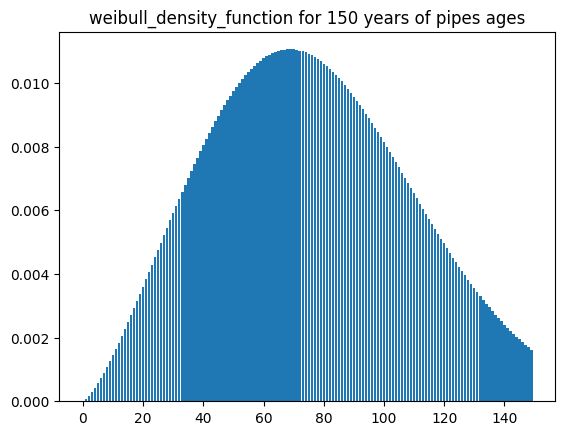

In [3]:
def weibull_density_function(x, a, b):
    k = (1/a)**b 
    return np.where(x > 0, k*b*(x**(b-1))*(np.exp(-k*(x**b))), 0)

failure_density = [weibull_density_function(k, a=87, b=2.35) for k in range(tot_simulation_year)]

plt.bar(range(tot_simulation_year), failure_density)
plt.title("weibull_density_function for 150 years of pipes ages")

Text(0.5, 1.0, 'weibull_cumulative_function for 150 years of pipes ages')

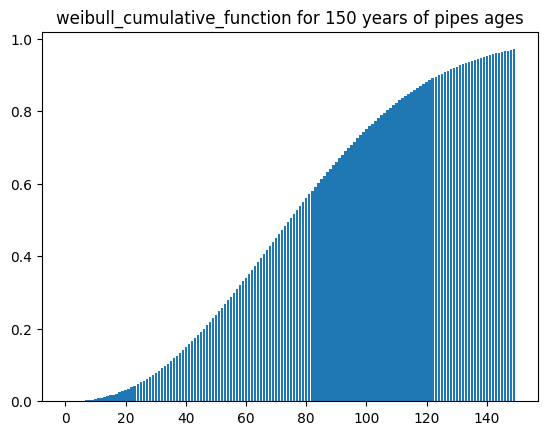

In [4]:
def weibull_cumulative_function(x, a, b):
    """ the Weibull distribution is a continuous probability distribution.
    [Source: (Scheidegger (2013))]

    :param x: array of pipe ages (variable)
    :param a: shape parameter (sets the displacement along the x-axis (translates the graph to the left or right)
    :param b: scale parameter (sets the growth rate)
    :return:
    """
    # For x ≥ 0, and F(x; k; λ) = 0 for x < 0.

    return np.where(x > 0, 1 - np.exp(-(x / a) ** b), 0)

weibull_cumulative_curve = [weibull_cumulative_function(k, a=87, b=2.35) for k in range(tot_simulation_year)]
plt.bar(range(tot_simulation_year), weibull_cumulative_curve)
plt.title("weibull_cumulative_function for 150 years of pipes ages")

In [5]:
weibull_50 = weibull_cumulative_function(tot_simulation_year*0.5, a=87, b=2.35) 
weibull_50

array(0.50615984)

<BarContainer object of 150 artists>

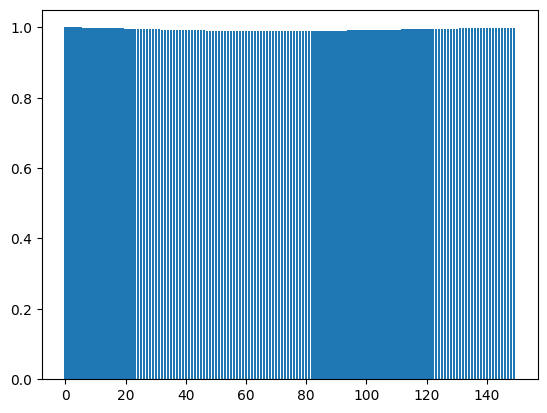

In [6]:
def weibull_survival_density_function(x, a, b):
    k = (1/a)**b 
    return np.where(x > 0, 1-(k*b*(x**(b-1))*(np.exp(-k*(x**b)))), 1)

survival_density = [weibull_survival_density_function(k, a=87, b=2.35) for k in range(150)]
plt.bar(range(len(survival_density)), survival_density)

<BarContainer object of 150 artists>

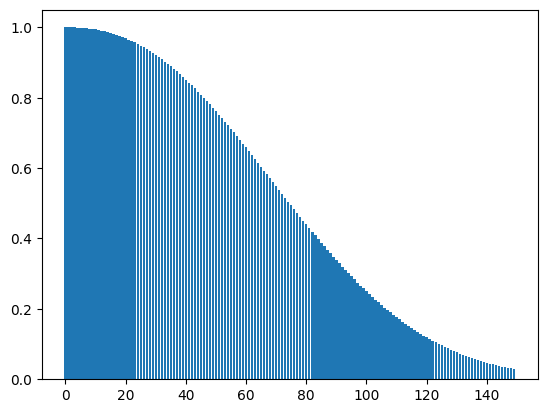

In [7]:
def weibull_survival_function(x, a, b):
 
    return np.where(x > 0, np.exp(-(x / a) ** b), 1.0)
survival_curve = [weibull_survival_function(k, a=87, b=2.35) for k in range(150)]
plt.bar(range(len(survival_curve)), survival_curve)

In [8]:
tot_simulation_year

150

In [9]:
years_tot_sim = tot_simulation_year
year_i = 2018
initial_pipes_age = 0  # initial (arbitrary) pipe age for all pipes in the network

year_f = year_i + 20   # final year for the network deterioration model, X years before the starting year for the simulation
preprocess = year_i - year_o


year_step = 5          # time steps in years for the hydraulic design (based on Input form UB) and transition pathways



In [10]:
result_dir = Path(fr"C:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\USTER\output\csv\Deterioration_{years_tot_sim}")
result_dir.exists()

True

In [11]:
year_o, year_i, year_f, years_tot_sim

(1888, 2018, 2038, 150)

In [12]:
columns_needed = [f"{column}_{year}" for year in range(year_i, year_f + 1) for column in [f'age', f'prob_failure', f'failed']]

columns_age = [f"{column}_{year}" for year in range(year_i, year_f + 1) for column in [f'age']]
files_count = 0

min_age = 9999
max_age = 0


for file in result_dir.iterdir():
    st=file.name
    if st.find("[") :
        iter=int(st[st.find("[")+1:st.rfind("]")])
    
#     file = next(Path.joinpath(result_dir, f) for f in result_dir.iterdir() if Path.joinpath(result_dir, f).is_file())
    if file.is_file():
        files_count += 1
        pipes = pd.read_csv(file, sep=";", header=0, usecols=columns_age)
        
        # Get youngest and oldest pipe ages to define the size of the new data frame
        min_age = min(min_age, min(pipes.min(axis=0,skipna=True, numeric_only=True)))
        max_age = max(max_age, max(pipes.max(axis=0,skipna=True, numeric_only=True)))

In [13]:
files_count

1171

In [14]:
    
def rename_files(file, iter:int, rename_files_bool:bool=False):
    
    st=file.name
    if "[" not in st and "(" in st:
        beggining=st[:st.rfind(")")+1]        
        ending=st[st.rfind(")")+1:]
        # print(beggining, iter, ending)
        
        new_name = beggining + f"[{iter}]" + ending
        print(new_name)
        if rename_files_bool:
            file.rename(file.with_name(new_name))
        pass

    if "[" not in st and "(" not in st:
        
        # print(beggining, iter, ending)
        
        new_name =  st[:-4]  + f"[{0}]" + st[-4:] 
        print(new_name)

        if rename_files_bool:
            file.rename(file.with_name(new_name))
        

    if "(" not in st and "[" in st:
        old_name = st
        beggining=st[:st.rfind("[")-4]
        year=st[st.rfind("[")-4:st.rfind("[")]
        ending=st[st.rfind("["):]
        # print(beggining, year, ending)
        new_name = beggining +f"({year})"+ending
        print(new_name)
        
        if rename_files_bool:
            file.rename(file.with_name(new_name))

In [15]:
# # algorithm to rename files with number of iteration
# iter = 0
# max_iter=0
# rename_files_bool =False

# for folder in result_dir.iterdir():
#     st=folder.name
#     if folder is dir():
        
#         for file in folder.iterdir():
#             if "[" in st:
#                 max_iter = int(st[st.find("[")+1:st.rfind("]")])
#                 if max_iter > iter:
#                     iter = max_iter
#                     print(max_iter, iter)
#     else:
#         if "[" in st:            
#             max_iter = int(st[st.find("[")+1:st.rfind("]")])
#             if max_iter > iter:
#                 iter = max_iter
#                 print(max_iter, iter)

# print(iter) # Check which iteration namber will be assigned to the files 

# for folder in result_dir.iterdir():
#     if folder is dir():
#         for file in folder.iterdir():
#             rename_files(file, iter=iter, rename_files_bool=rename_files_bool)
#     else:
#         rename_files(folder, iter=iter, rename_files_bool=rename_files_bool)

        

In [16]:
files_count, min_age, max_age

(1171, 1, 151)

In [17]:
# df__ = pd.DataFrame(index=range(files_count), data=0, columns=range(min_age, max_age+1))


# # Prepare empty dictionaries
# df_distributions = dict([(k, df__.copy()) for k in ["failures","non_failures", "totals", "survival", "densities", "cumulatives"]])
# df_distributions

In [18]:
# Plot style : Comic 
# plt.xkcd()

In [19]:
from scipy.signal import savgol_filter

In [20]:
path = next(Path.joinpath(result_dir, f) for f in result_dir.iterdir() if Path.joinpath(result_dir, f).is_file())
print(path)
pipes = pd.read_csv(path, sep=";", header=0, usecols=columns_needed)
pd.set_option("display.max_columns", len(pipes.columns))
pipes

C:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\USTER\output\csv\Deterioration_150\Deterioration_USTER_200_374_150_[0].csv


age_2018  prob_failure_2018  failed_2018  age_2019  prob_failure_2019  \
0          30           0.005173            0        31           0.005467   
1          47           0.011043            0        48           0.011444   
2          58           0.015759            0        59           0.016221   
3          23           0.003308            0        24           0.003553   
4          44           0.009878            0        45           0.010261   
..        ...                ...          ...       ...                ...   
388        15           0.001619            0        16           0.001803   
389       131           0.061905            0       132           0.062690   
390        51           0.012679            0        52           0.013102   
391        76           0.024874            0        77           0.025428   
392        65           0.019105            0        66           0.019604   

     failed_2019  age_2020  prob_failure_2020  failed_2020  age_2021  \
0              0        32           0.005768            0        33   
1              0        49           0.011850            0        50   
2              0        60           0.016689            0        61   
3              0        25           0.003806            0        26   
4              0        46           0.010649            0        47   
..           ...       ...                ...          ...       ...   
388            0        17           0.001995            0        18   
389            0       133           0.063479            0       134   
390            0        53           0.013531            0        54   
391            0        78           0.025987            0        79   
392            0        67           0.020109            0        68   

     prob_failure_2021  failed_2021  age_2022  prob_failure_2022  failed_2022  \
0             0.006075            0        34           0.006389            0   
1             0.012262            0        51           0.012679            0   
2             0.017161            0        62           0.017639            0   
3             0.004065            0        27           0.004332            0   
4             0.011043            0        48           0.011444            0   
..                 ...          ...       ...                ...          ...   
388           0.002194            0        19           0.002402            0   
389           0.064272            0       135           0.065068            0   
390           0.013966            0        55           0.014406            0   
391           0.026551            0        80           0.027120            0   
392           0.020618            0        69           0.021132            0   

     age_2023  prob_failure_2023  failed_2023  age_2024  prob_failure_2024  \
0          35           0.006710            0        36           0.007037   
1          52           0.013102            1         1           0.000030   
2          63           0.018123            0        64           0.018612   
3          28           0.004605            0        29           0.004886   
4          49           0.011850            0        50           0.012262   
..        ...                ...          ...       ...                ...   
388        20           0.002617            0        21           0.002840   
389       136           0.065867            0       137           0.066671   
390        56           0.014852            0        57           0.015303   
391        81           0.027693            0        82           0.028272   
392        70           0.021652            0        71           0.022177   

     failed_2024  age_2025  prob_failure_2025  failed_2025  age_2026  \
0              0        37           0.007370            0        38   
1              0         2           0.000071            0         3   
2              0        65           0.019105            0        66   
3    

In [21]:
max(pipes.max(axis=0,skipna=True, numeric_only=True))


151.0

In [22]:
failure_age_list = []
non_failure_age_list = []

for idx, location in pipes.iterrows():
    for year in range(year_i, year_f + 1):
        
        if location[f'failed_{year}'] == 1:
            failure_age_list.append(location[f'age_{year}'])
       
            
list(failure_age_list) # Counts the pipes that failed

[52.0,
 57.0,
 80.0,
 71.0,
 50.0,
 47.0,
 58.0,
 60.0,
 107.0,
 76.0,
 89.0,
 45.0,
 39.0,
 82.0,
 86.0,
 94.0,
 61.0,
 84.0,
 76.0,
 57.0,
 31.0,
 109.0,
 135.0,
 97.0,
 35.0,
 29.0,
 91.0,
 56.0,
 76.0,
 85.0,
 78.0,
 62.0,
 79.0,
 76.0,
 74.0,
 33.0,
 140.0,
 105.0,
 79.0,
 81.0,
 72.0,
 72.0,
 97.0,
 90.0,
 73.0,
 80.0,
 79.0,
 51.0,
 88.0,
 141.0,
 26.0,
 41.0,
 54.0,
 80.0,
 34.0,
 106.0,
 148.0,
 87.0,
 110.0,
 89.0,
 47.0,
 50.0,
 46.0,
 81.0,
 141.0,
 105.0,
 51.0,
 133.0,
 64.0,
 137.0,
 96.0,
 69.0,
 137.0,
 116.0,
 54.0,
 68.0,
 78.0,
 137.0,
 141.0,
 89.0,
 34.0,
 18.0,
 111.0,
 48.0,
 82.0,
 135.0,
 75.0,
 76.0,
 139.0,
 41.0,
 75.0,
 44.0,
 48.0,
 90.0,
 63.0,
 61.0,
 50.0,
 50.0,
 85.0,
 116.0,
 28.0,
 52.0,
 109.0,
 66.0,
 60.0,
 84.0,
 42.0,
 35.0,
 80.0,
 34.0,
 93.0,
 74.0,
 69.0,
 107.0,
 114.0,
 70.0,
 60.0,
 82.0,
 65.0,
 79.0,
 144.0,
 61.0]

In [23]:
failure_age_list = np.array(failure_age_list)
sum(failure_age_list > 20)

121

In [24]:
def surv(age, failure_age_list):
    
    total_n = len(failure_age_list)
    failure_age_list = np.array(failure_age_list)
    surviving_n = sum(failure_age_list > age)
    fraction = surviving_n/total_n
    
    return fraction    

In [25]:
surv_prob=[surv(a, failure_age_list) for a in range(max_age)]
surv_prob


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9918032786885246,
 0.9918032786885246,
 0.9918032786885246,
 0.9918032786885246,
 0.9918032786885246,
 0.9918032786885246,
 0.9918032786885246,
 0.9918032786885246,
 0.9836065573770492,
 0.9836065573770492,
 0.9754098360655737,
 0.9672131147540983,
 0.9672131147540983,
 0.9590163934426229,
 0.9590163934426229,
 0.9508196721311475,
 0.9262295081967213,
 0.9098360655737705,
 0.9098360655737705,
 0.9098360655737705,
 0.9098360655737705,
 0.9016393442622951,
 0.9016393442622951,
 0.8852459016393442,
 0.8770491803278688,
 0.8770491803278688,
 0.8688524590163934,
 0.860655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.7868852459016393,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7295081967213115,
 0.7131147540983607,
 0.7049180327868853,
 0.7049180327868853,
 0.6803278688

In [26]:
weib_prob=[1 - weibull_cumulative_function(x, a=87.0, b= 2.72) for x in range(max_age)]
weib_prob

[1.0,
 0.9999946971849354,
 0.9999650617108916,
 0.9998947421273641,
 0.9997698235846383,
 0.9995777065661963,
 0.9993066884428606,
 0.9989457459629422,
 0.9984844052847245,
 0.9979126580406722,
 0.9972209045703184,
 0.9963999145203115,
 0.9954407992186889,
 0.9943349924001512,
 0.9930742370683133,
 0.9916505769969776,
 0.990056351817653,
 0.9882841949285903,
 0.9863270336532804,
 0.9841780912089344,
 0.9818308901389,
 0.9792792569302161,
 0.9765173275867896,
 0.9735395539653949,
 0.9703407107094542,
 0.9669159026368154,
 0.9632605724542705,
 0.9593705086845299,
 0.9552418537017249,
 0.9508711117798821,
 0.9462551570656801,
 0.941391241392554,
 0.9362770018581118,
 0.9309104680911007,
 0.9252900691379737,
 0.9194146399025961,
 0.9132834270758884,
 0.9068960944953405,
 0.9002527278773739,
 0.8933538388685777,
 0.8862003683649007,
 0.878793689051007,
 0.8711356071152102,
 0.8632283630987132,
 0.8550746318413145,
 0.8466775214893095,
 0.8380405715350093,
 0.8291677498611469,
 0.8200634487

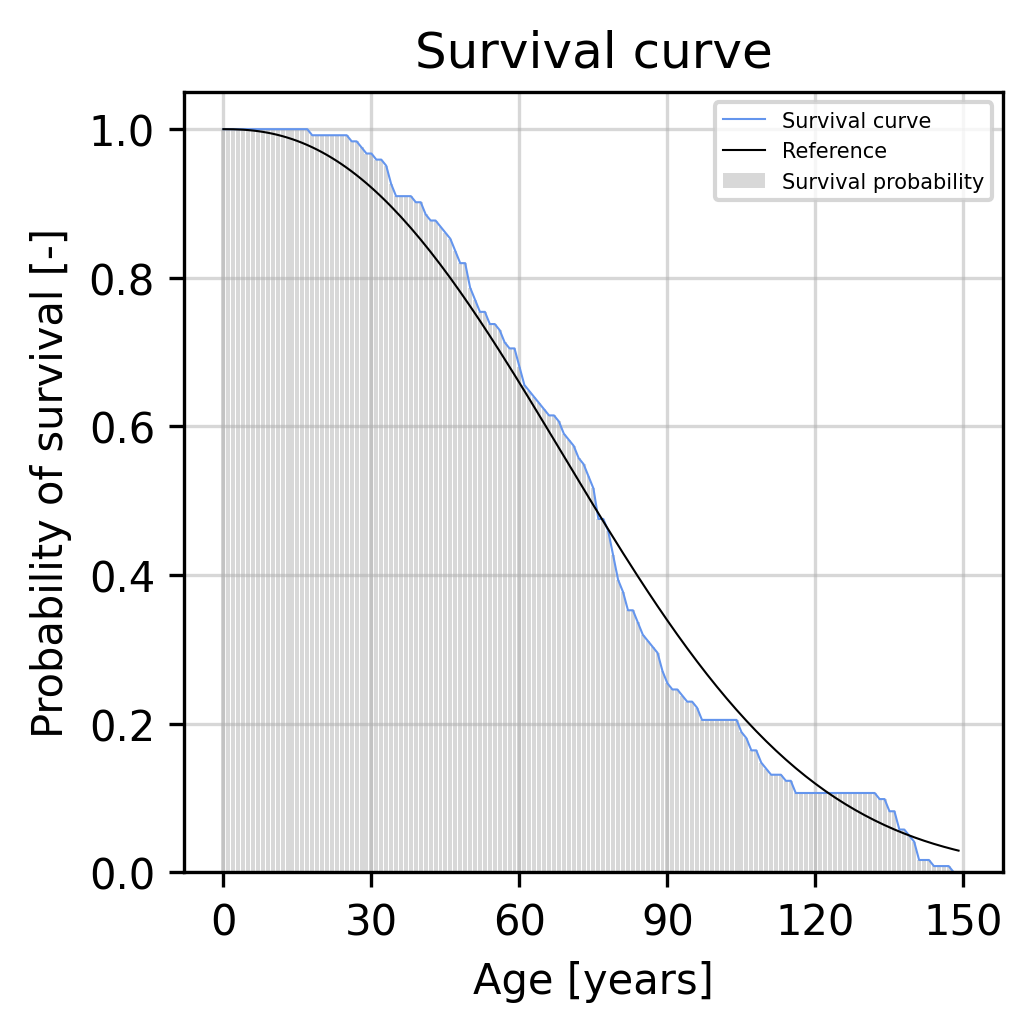

In [27]:
fig1, ax = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig1.set_facecolor("white")
ax.set_title('Survival curve')
ax.set_ylabel(f'Probability of survival [-]')
ax.set_xlabel('Age [years]')
x_pos = np.arange(max_age+5, step=np.round((max_age)/5, 0))
ax.set_xticks(x_pos)

ax.bar(range(max_age), surv_prob, align='center', alpha=0.3, color="grey", label="Survival probability")
ax.plot(range(max_age), surv_prob, color="cornflowerblue", linewidth=0.5, label="Survival curve")
ax.plot(range(150), survival_curve, color="black", linewidth=0.5, label="Reference")
ax.legend(loc="best",fontsize=5)
ax.grid(True, alpha=0.5)
fig1.tight_layout()


# fig1.savefig(fr"C:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\test/figures/P2_({100}-{max_age})[{years_tot_sim}]_cumulative_survival_LEFT-TRUNCTATION.png", dpi=900)
    

In [28]:
failure_prob=[1-a for a in surv_prob]
failure_prob

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008196721311475419,
 0.008196721311475419,
 0.008196721311475419,
 0.008196721311475419,
 0.008196721311475419,
 0.008196721311475419,
 0.008196721311475419,
 0.008196721311475419,
 0.016393442622950838,
 0.016393442622950838,
 0.024590163934426257,
 0.032786885245901676,
 0.032786885245901676,
 0.040983606557377095,
 0.040983606557377095,
 0.049180327868852514,
 0.07377049180327866,
 0.0901639344262295,
 0.0901639344262295,
 0.0901639344262295,
 0.0901639344262295,
 0.09836065573770492,
 0.09836065573770492,
 0.11475409836065575,
 0.12295081967213117,
 0.12295081967213117,
 0.1311475409836066,
 0.139344262295082,
 0.14754098360655743,
 0.16393442622950816,
 0.180327868852459,
 0.180327868852459,
 0.21311475409836067,
 0.2295081967213115,
 0.24590163934426235,
 0.24590163934426235,
 0.2622950819672131,
 0.2622950819672131,
 0.2704918032786885,
 0.28688524590163933,
 0.29508196

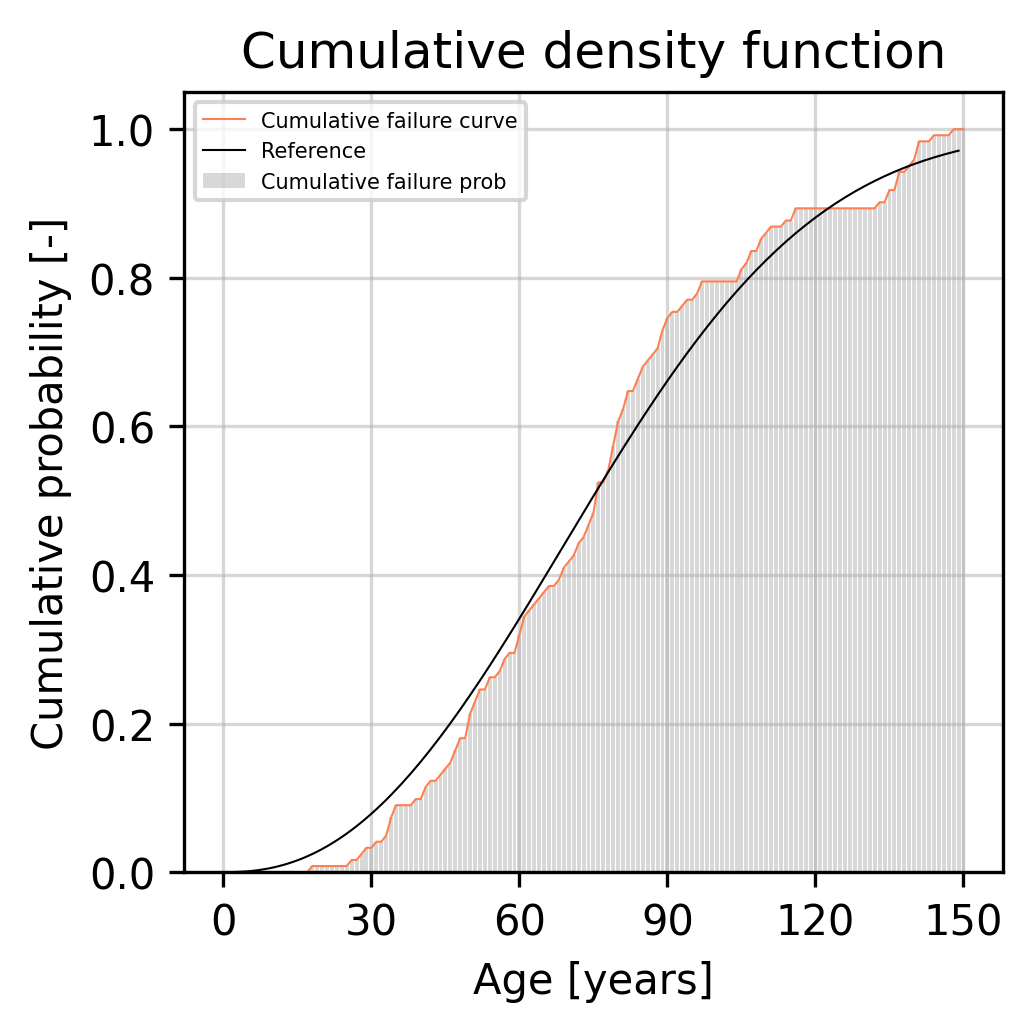

In [29]:
fig1, ax = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig1.set_facecolor("white")
ax.set_title('Cumulative density function')
ax.set_ylabel('Cumulative probability [-]')
ax.set_xlabel('Age [years]')
x_pos = np.arange(max_age+5, step=np.round((max_age)/5, 0))
ax.set_xticks(x_pos)

ax.bar(range(max_age), failure_prob, align='center', alpha=0.3, color="grey", label="Cumulative failure prob")
ax.plot(range(max_age), failure_prob, color="coral", linewidth=0.5, label="Cumulative failure curve")
ax.plot(range(150), weibull_cumulative_curve, color="black", linewidth=0.5, label="Reference ")
ax.legend(loc="best",fontsize=5)
ax.grid(True, alpha=0.5)
fig1.tight_layout()


# fig1.savefig(fr"C:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\test/figures/P2_({100}-{max_age})[{years_tot_sim}]_cumulative_failure_LEFT-TRUNCTATION.png", dpi=900)

Empty Dictionaries for failure curves 

In [30]:
df__ = pd.DataFrame(index=range(files_count), data=0, columns=range(min_age, max_age+1))


# Prepare empty dictionaries
df_distributions = dict([(k, df__.copy()) for k in ["frequency_failure",
                                                    "frequency_survival", 
                                                    "frequency_pipes", 
                                                    "density_survival", 
                                                    "density_failure", 
                                                    "cumulative_survival",
                                                    "cumulative_failure"]])


Frequency of failures over time for each pipe age

In [31]:
result_dir

WindowsPath('C:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/Data/data/USTER/output/csv/Deterioration_150')

In [32]:
# LOOP PER SIMULATION RUN
iter = 0
    
for file in result_dir.iterdir():

    st = file.name
    iter = int(st[st.find("[") + 1:st.rfind("]")])
    

    pipes = pd.read_csv(file, sep=";", header=0, usecols=columns_needed)  # Get dataframe

    amount_pipes = pipes.shape[0]

    frequency_failure = dict([(k, 0) for k in range(min_age, max_age + 1)])
    frequency_survival = dict([(k, 0) for k in range(min_age, max_age + 1)])
    


    frequency_pipes = dict([(k, 0) for k in range(min_age, max_age + 1)])

    for idx, pipe in pipes.iterrows():
        continue_ = True

        for year in range(year_i, year_f + 1):
            # print(idx, year, pipe[f'age_{year}'], pipe[f'failed_{year}'])

            age = pipe[f'age_{year}']

            if continue_:
                if pipe[f'failed_{year}'] == 1:
                    continue_ = False
                    # print(f" Failure pipe {idx}")

                    frequency_pipes[age] += 1
                    frequency_failure[age] += 1
                    
                    
                else:

                    frequency_pipes[age] += 1
                    frequency_survival[age] += 1
                    
                    if year == year_f:
                        continue_ = False
                        # print(f" NON Failure pipe {idx}")
    
    ## ------Finished loop through the pipes
        
    # Save to dataframes
    for age in range(min_age, max_age+1):

        df_distributions["frequency_failure"].loc[iter, age] = frequency_failure[age]  # save failing pipes in the DataFrame
        df_distributions["frequency_survival"].loc[iter, age] = frequency_survival[age]  # save surviving pipes in the DataFrame
        df_distributions["frequency_pipes"].loc[iter, age] = frequency_pipes[age]  # save surviving pipes in the DataFrame
    
 

In [33]:
df_distributions["frequency_failure"]     

1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1167    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
1168    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1169    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1170    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      15   16   17   18   19   20   21   22   23   24   25   26   27   28   \
0       0    0    0    1    0    0    0    0    0    0    0    1    0    1   
1       0    1    0    1    0    0    1    1    0    1    1    1    0    0   
2       0    0    0    0    0    1    0    0    2    0    0    0    0    1   
3       0    0    0    0    0    0    0    0    1    1    0    0    0    0   
4       2    0    0    0    0    0    1    0    2    0    1    0    1    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166    0    0    0    0    1    1    1    0    1    0    2    0    0    0   
1167    0    0    0    0    1    1    0    1    1    0    0    1    0    2   
1168    1    0    0    2    1    0    0    0    0    0    0    0    0    1   
1169    0    0    0    0    0    1    0    1    0    1    1    1    1    0   
1170    1    0    0    0    0    0    0    0    0    0    0    0    0    1   

      29   30   31   ...  121  122  123  124  125  126  127  128  129  130  \
0       1    0    1  ...    0    0    0    0    0    0    0    0    0    0   
1       0    1    0  ...    0    0    0    0    0    0    0    0    0    0   
2       1    0    0  ...    0    0    0    0    0    0    0    0    1    0   
3       1    0    0  ...    0    0    0    0    0    0    0    0    0    0   
4       1    0    1  ...    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166    1    0    0  ...    0    0    0    0    0    0    0    0    0    0   
1167    1    0    1  ...    0    0    0    0    0    0    0    0    0    0   
1168    0    1    0  ...    0    0    0    0    0    0    0    0    0    0   
1169    1    3    1  ...    0    0    0    0    0    0    0    0    0    0   
1170    1    1    0  ...    0    1    0    0    0    0    0    0    0    0   

      131  132  133  134  135  136  137  138  139  140  141  142  143  144  \
0       0    0    1    0    2    0    3    0    1    1    3    0    0    1   
1       2    1    1    0    0    2    1    2    2    1    1    0    1    0   
2       0    1    0    1    1    0    1    0    0    0    0    1    2    0   
3       1    1    1    0    0    1    1    1    0    0    0    1    1    0   
4       0    0    0    0    2    1    3    0    1    0    1    0    2    1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166    2    2    1    2    2    0    2    0    1    0    1    2    0    0   
1167    1    0    1    0    2    1    1    0    3    1    0    0    0    0   
1168    0    1    2    0    0    0    2    0    0    2    1    1    0    1   
1169    0    2    5    1    3    1    0    2    0    0    1    0    1    0   
1170    0    1    1    2    0    2    0    1    4    0    0    2    0    1   

      145  146  147  148  149  150  151  
0       0    0    0    1    0    0    0  
1       0    0    0    1    0    0    0  
2       1    1    0    0    1    0    1  
3       0    1    1    0    1    1    0  
4       0    0    0    0    1    1    1  
...   

In [34]:
df_distributions["frequency_survival"]

1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0       5    8   14   18   23   29   32   37   39   51   55   59   61   63   
1       6    8   13   17   25   31   37   44   45   52   56   61   67   70   
2       1    6   12   16   19   25   30   34   37   43   47   50   55   63   
3       5    8   15   19   23   27   31   32   36   40   46   53   59   65   
4       5    8   12   21   25   31   35   37   45   50   61   65   69   76   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166    5   11   19   24   29   35   38   41   47   54   60   66   68   72   
1167    4   10   16   21   23   31   39   41   46   51   52   58   67   73   
1168    6   14   22   25   35   39   41   48   55   59   65   72   73   76   
1169    4    9   22   25   32   36   42   47   55   58   61   65   69   73   
1170    4    7   14   17   22   26   30   35   37   40   48   54   58   60   

      15   16   17   18   19   20   21   22   23   24   25   26   27   28   \
0      67   72   76   81   84   88   91   95  101   97   98   96   98   99   
1      75   85   90   95  100  109  112  111  113  108  105  102  103  107   
2      69   74   82   84   92  102  104  108  107  105  105  112  112  111   
3      71   75   80   83   87   96   98   99   99   96   94   97  101  106   
4      76   82   91   96   99  106  108  108  109  111  106  107  102  103   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166   77   83   92   97  102  105  107  104  100   96   96   97   99  101   
1167   78   83   86   93   96  100  104  106  102  104  103  104  104  100   
1168   80   84   90   92   96  103  107  107  105  103  108  108  108  110   
1169   78   82   84   88   89   93   99   99  104   94   92   90   90   87   
1170   65   73   77   82   88   92   96   99  102  102  107  108  104  107   

      29   30   31   ...  121  122  123  124  125  126  127  128  129  130  \
0      98  101   96  ...    1    1    0    0    0    0    0    0    0    0   
1     107  114  116  ...    1    1    1    0    0    0    0    0    0    0   
2     108  113  112  ...    3    3    3    3    3    3    3    3    2    2   
3     110  108  108  ...    3    3    2    2    1    1    0    0    0    0   
4     108  107  105  ...    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166  105  104  106  ...    1    1    1    1    1    1    1    1    1    1   
1167   99   97   97  ...    2    2    2    2    2    2    2    2    2    2   
1168  107  101  104  ...    0    0    0    0    0    0    0    0    0    0   
1169   86   83   88  ...    0    0    0    0    0    0    0    0    0    0   
1170  106  111  116  ...    2    1    1    1    1    0    0    0    0    0   

      131  132  133  134  135  136  137  138  139  140  141  142  143  144  \
0      14   14   13   13   11   11    8    8    7    6    3    3    3    2   
1      16   15   14   14   14   12   11    9    7    6    5    5    4    4   
2      14   13   12   10    9    9    8    8    8    8    8    7    5    5   
3      17   16   15   15   15   14   13   12   12   12   12   11   10   10   
4      19   19   19   19   17   16   13   13   12   12   11   11    9    8   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166   17   15   14   12   10   10    8    8    7    7    6    4    4    4   
1167   15   14   13   13   11   10    9    9    6    5    5    5    5    5   
1168   16   15   13   13   13   13   11   11   11    9    8    7    7    6   
1169   25   23   18   17   14   13   13   11   11   11   10   10    9    9   
1170   20   19   18   16   16   14   14   13    9    9    9    7    7    6   

      145  146  147  148  149  150  151  
0       2    2    2    1    1    1    1  
1       4    4    4    3    3    3    3  
2       4    3    3    3    2    2    1  
3      10    9    8    8    7    6    6  
4       8    8    8    8    7    6    5  
...   

In [35]:
df_distributions["frequency_pipes"]

1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0       5    8   14   18   23   29   32   37   39   51   55   59   61   63   
1       6    8   13   17   25   31   37   44   45   52   56   61   67   70   
2       1    6   12   16   19   25   30   34   37   43   47   50   55   63   
3       5    8   15   19   23   27   31   32   36   40   46   53   59   65   
4       5    8   12   21   25   31   35   37   45   50   61   65   69   76   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166    5   11   19   24   29   35   38   41   47   54   60   66   68   72   
1167    4   10   16   21   23   31   39   41   46   51   53   58   67   73   
1168    6   14   22   25   35   39   41   48   55   59   65   72   73   76   
1169    4    9   22   25   32   36   42   47   55   58   61   65   69   73   
1170    4    7   14   17   22   26   30   35   37   40   48   54   58   60   

      15   16   17   18   19   20   21   22   23   24   25   26   27   28   \
0      67   72   76   82   84   88   91   95  101   97   98   97   98  100   
1      75   86   90   96  100  109  113  112  113  109  106  103  103  107   
2      69   74   82   84   92  103  104  108  109  105  105  112  112  112   
3      71   75   80   83   87   96   98   99  100   97   94   97  101  106   
4      78   82   91   96   99  106  109  108  111  111  107  107  103  103   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166   77   83   92   97  103  106  108  104  101   96   98   97   99  101   
1167   78   83   86   93   97  101  104  107  103  104  103  105  104  102   
1168   81   84   90   94   97  103  107  107  105  103  108  108  108  111   
1169   78   82   84   88   89   94   99  100  104   95   93   91   91   87   
1170   66   73   77   82   88   92   96   99  102  102  107  108  104  108   

      29   30   31   ...  121  122  123  124  125  126  127  128  129  130  \
0      99  101   97  ...    1    1    0    0    0    0    0    0    0    0   
1     107  115  116  ...    1    1    1    0    0    0    0    0    0    0   
2     109  113  112  ...    3    3    3    3    3    3    3    3    3    2   
3     111  108  108  ...    3    3    2    2    1    1    0    0    0    0   
4     109  107  106  ...    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166  106  104  106  ...    1    1    1    1    1    1    1    1    1    1   
1167  100   97   98  ...    2    2    2    2    2    2    2    2    2    2   
1168  107  102  104  ...    0    0    0    0    0    0    0    0    0    0   
1169   87   86   89  ...    0    0    0    0    0    0    0    0    0    0   
1170  107  112  116  ...    2    2    1    1    1    0    0    0    0    0   

      131  132  133  134  135  136  137  138  139  140  141  142  143  144  \
0      14   14   14   13   13   11   11    8    8    7    6    3    3    3   
1      18   16   15   14   14   14   12   11    9    7    6    5    5    4   
2      14   14   12   11   10    9    9    8    8    8    8    8    7    5   
3      18   17   16   15   15   15   14   13   12   12   12   12   11   10   
4      19   19   19   19   19   17   16   13   13   12   12   11   11    9   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166   19   17   15   14   12   10   10    8    8    7    7    6    4    4   
1167   16   14   14   13   13   11   10    9    9    6    5    5    5    5   
1168   16   16   15   13   13   13   13   11   11   11    9    8    7    7   
1169   25   25   23   18   17   14   13   13   11   11   11   10   10    9   
1170   20   20   19   18   16   16   14   14   13    9    9    9    7    7   

      145  146  147  148  149  150  151  
0       2    2    2    2    1    1    1  
1       4    4    4    4    3    3    3  
2       5    4    3    3    3    2    2  
3      10   10    9    8    8    7    6  
4       8    8    8    8    8    7    6  
...   

True

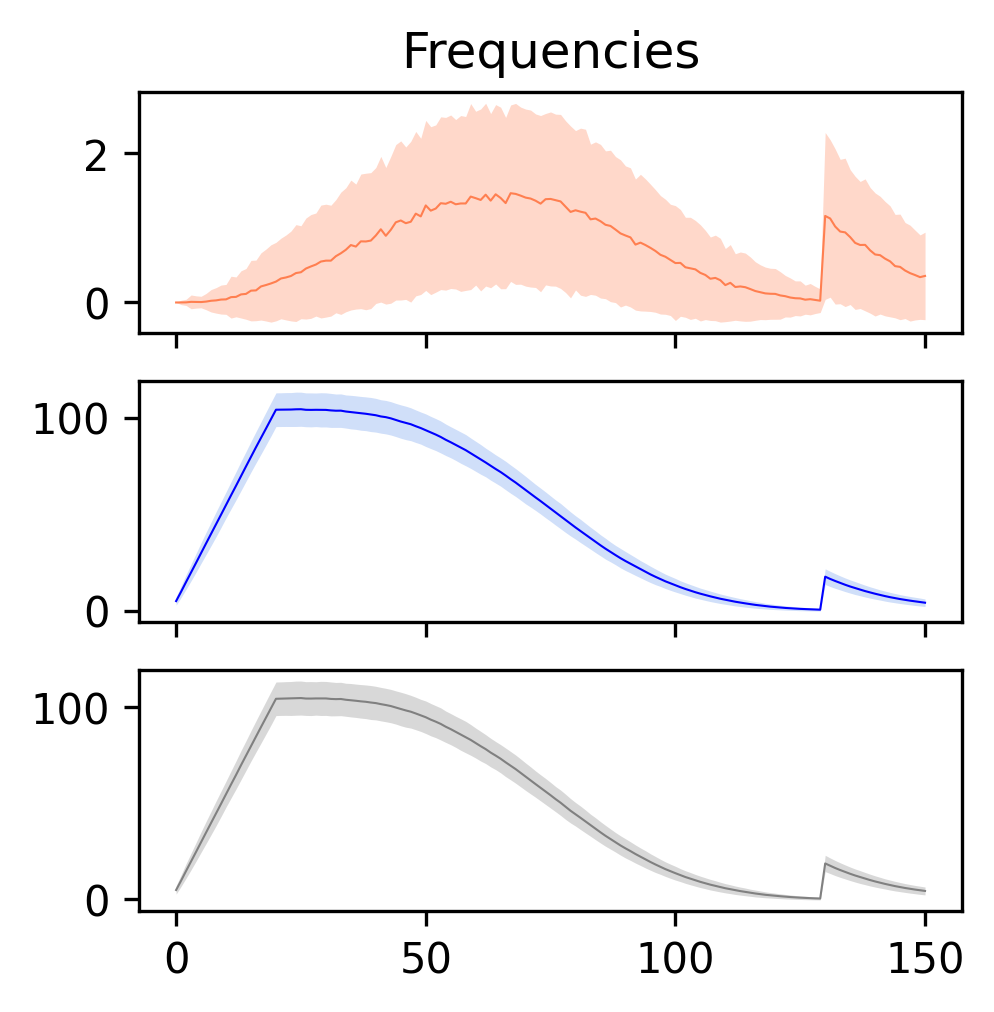

In [36]:
# check amount of pipes per age to normalize correctly
df1=df_distributions["frequency_failure"]
df2=df_distributions["frequency_survival"]
df3= df_distributions["frequency_pipes"]

df_add = df1.add(df2, fill_value=0)
df_equals = df3.equals(df_add)

mean1 = df1.mean(axis=0)
mean2 = df2.mean(axis=0)
mean3 = df3.mean(axis=0)

std1 = df1.std(axis=0)
std2 = df2.std(axis=0)
std3 = df3.std(axis=0)

lb1 = mean1 - std1
lb2 = mean2 - std2
lb3 = mean3 - std3

ub1 = mean1 + std1
ub2 = mean2 + std2
ub3 = mean3 + std3

fig1, (ax1, ax2, ax3) = plt.subplots(3, sharex= True, figsize=(cm2inch((9, 9))), dpi=300)
fig1.set_facecolor("white")
ax1.set_title("Frequencies")

ax1.plot(range(max_age), mean1, color="coral", lw=0.5)
ax1.fill_between(range(max_age), lb1, ub1, color="coral", lw=0, alpha=0.3)

ax2.plot(range(max_age), mean2, color="blue", lw=0.5)
# ax2.plot(range(max_age), mean3, color="red", lw=0.5)
ax2.fill_between(range(max_age), lb2, ub2, color="cornflowerblue", lw=0, alpha=0.3)

ax3.plot(range(max_age), mean3, color="grey", lw=0.5)
ax3.fill_between(range(max_age), lb3, ub3, color="grey", lw=0, alpha=0.3)

# ax3.plot(range(max_age), df_add.mean(axis=0), color="grey", lw=.5)
 
df_equals

In [37]:
total_failures = df_distributions["frequency_failure"].sum(axis=0)
print(max(list(total_failures)))


1716


In [38]:
(df_distributions["frequency_failure"].divide(total_failures)).sum(axis=0)

1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
147    1.0
148    1.0
149    1.0
150    1.0
151    1.0
Length: 151, dtype: float64

In [39]:
amount_pipes

393

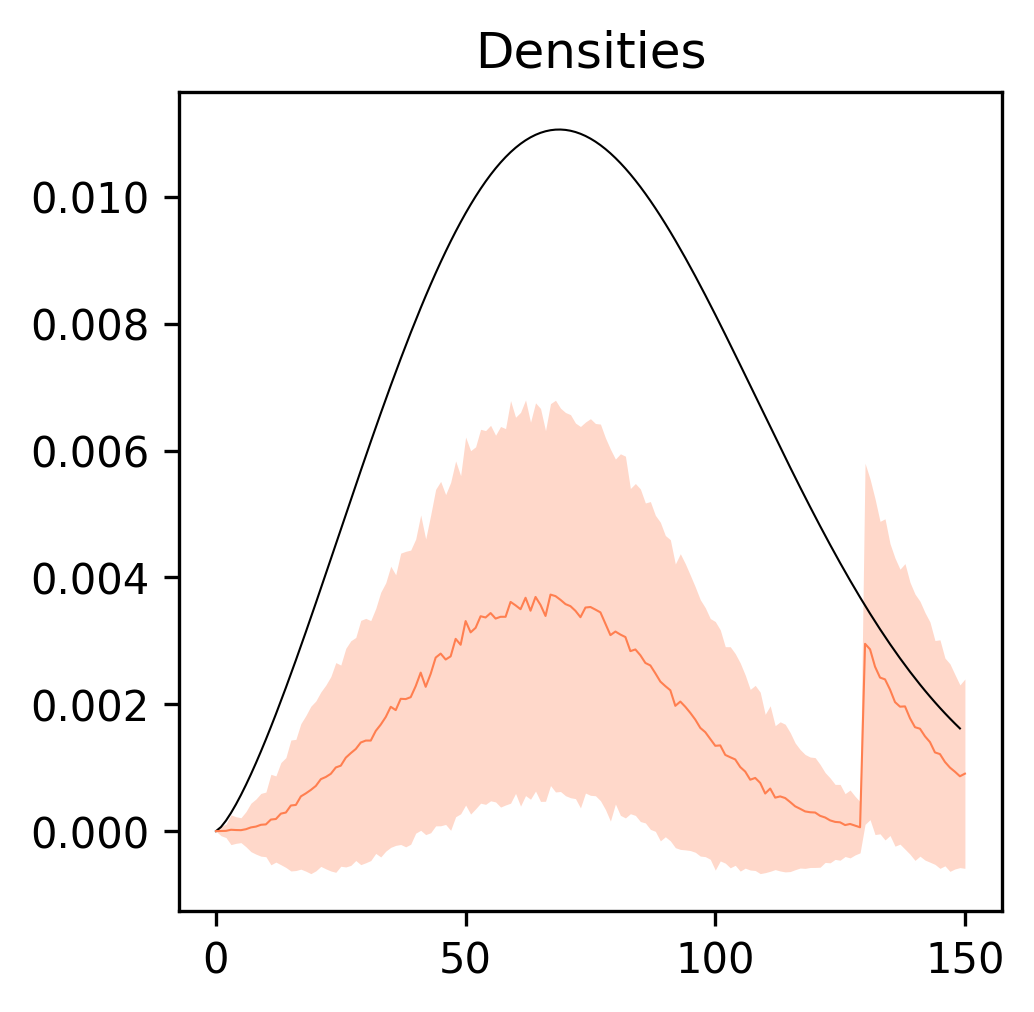

In [40]:
# Plot only the first failure for the initial set of pipes in the system 

df_distributions["density_failure"] = df_distributions["frequency_failure"].divide(amount_pipes, fill_value=np.NaN)
df4 = df_distributions["density_failure"]
# print(df_distributions["density_failure"])

mean4 = df4.mean(axis=0)
std4 = df4.std(axis=0)
lb4 = mean4 - std4
ub4 = mean4 + std4


fig2, ax4 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig2.set_facecolor("white")
ax4.set_title("Densities")

ax4.plot(range(150), failure_density[:150], color="black", lw=0.5)
ax4.plot(range(max_age), mean4, color="coral", lw=0.5)
ax4.fill_between(range(max_age), lb4, ub4, color="coral", lw=0, alpha=0.3)
ax4.grid(False)



In [41]:
df_distributions["d"] = df__.copy()
for k, col_survival in df_distributions["frequency_survival"].items():
    
    df_distributions["d"][k] = 1-((df_distributions["frequency_pipes"][k] - col_survival)/(amount_pipes))
    
        
df_distributions["d"].divide(1, fill_value=np.NaN)

1    2    3    4    5    6    7    8    9    10        11   12   13   \
0     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   
1     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   
2     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   
3     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...   
1166  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   
1167  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.997455  1.0  1.0   
1168  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   
1169  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   
1170  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0  1.0   

      14        15        16   17        18        19        20        21   \
0     1.0  1.000000  1.000000  1.0  0.997455  1.000000  1.000000  1.000000   
1     1.0  1.000000  0.997455  1.0  0.997455  1.000000  1.000000  0.997455   
2     1.0  1.000000  1.000000  1.0  1.000000  1.000000  0.997455  1.000000   
3     1.0  1.000000  1.000000  1.0  1.000000  1.000000  1.000000  1.000000   
4     1.0  0.994911  1.000000  1.0  1.000000  1.000000  1.000000  0.997455   
...   ...       ...       ...  ...       ...       ...       ...       ...   
1166  1.0  1.000000  1.000000  1.0  1.000000  0.997455  0.997455  0.997455   
1167  1.0  1.000000  1.000000  1.0  1.000000  0.997455  0.997455  1.000000   
1168  1.0  0.997455  1.000000  1.0  0.994911  0.997455  1.000000  1.000000   
1169  1.0  1.000000  1.000000  1.0  1.000000  1.000000  0.997455  1.000000   
1170  1.0  0.997455  1.000000  1.0  1.000000  1.000000  1.000000  1.000000   

           22        23        24        25        26        27        28   \
0     1.000000  1.000000  1.000000  1.000000  0.997455  1.000000  0.997455   
1     0.997455  1.000000  0.997455  0.997455  0.997455  1.000000  1.000000   
2     1.000000  0.994911  1.000000  1.000000  1.000000  1.000000  0.997455   
3     1.000000  0.997455  0.997455  1.000000  1.000000  1.000000  1.000000   
4     1.000000  0.994911  1.000000  0.997455  1.000000  0.997455  1.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1166  1.000000  0.997455  1.000000  0.994911  1.000000  1.000000  1.000000   
1167  0.997455  0.997455  1.000000  1.000000  0.997455  1.000000  0.994911   
1168  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.997455   
1169  0.997455  1.000000  0.997455  0.997455  0.997455  0.997455  1.000000   
1170  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.997455   

           29        30        31   ...  121       122  123  124  125  126  \
0     0.997455  1.000000  0.997455  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
1     1.000000  0.997455  1.000000  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
2     0.997455  1.000000  1.000000  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
3     0.997455  1.000000  1.000000  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
4     0.997455  1.000000  0.997455  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
...        ...       ...       ...  ...  ...       ...  ...  ...  ...  ...   
1166  0.997455  1.000000  1.000000  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
1167  0.997455  1.000000  0.997455  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
1168  1.000000  0.997455  1.000000  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
1169  0.997455  0.992366  0.997455  ...  1.0  1.000000  1.0  1.0  1.0  1.0   
1170  0.997455  0.997455  1.000000  ...  1.0  0.997455  1.0  1.0  1.0  1.0   

      127  128       129  130       131       132       133       134  \
0     1.0  1.0  1.000000  1.0  1.000000  1.000000  0.997455  1.000000   
1     1.0  1.0  1.000000  1.0  0.994911  0.997455  0.997455  1.000000   
2     1.0  1.0  0.997455  1.0  1.000000

In [42]:
# len(survival_density)
# previous= 1.0
# cum_lst=[]

# for v in survival_density:
#     gap = 1.0 - v
#     previous -= gap
#     cum_lst.append(previous)
    


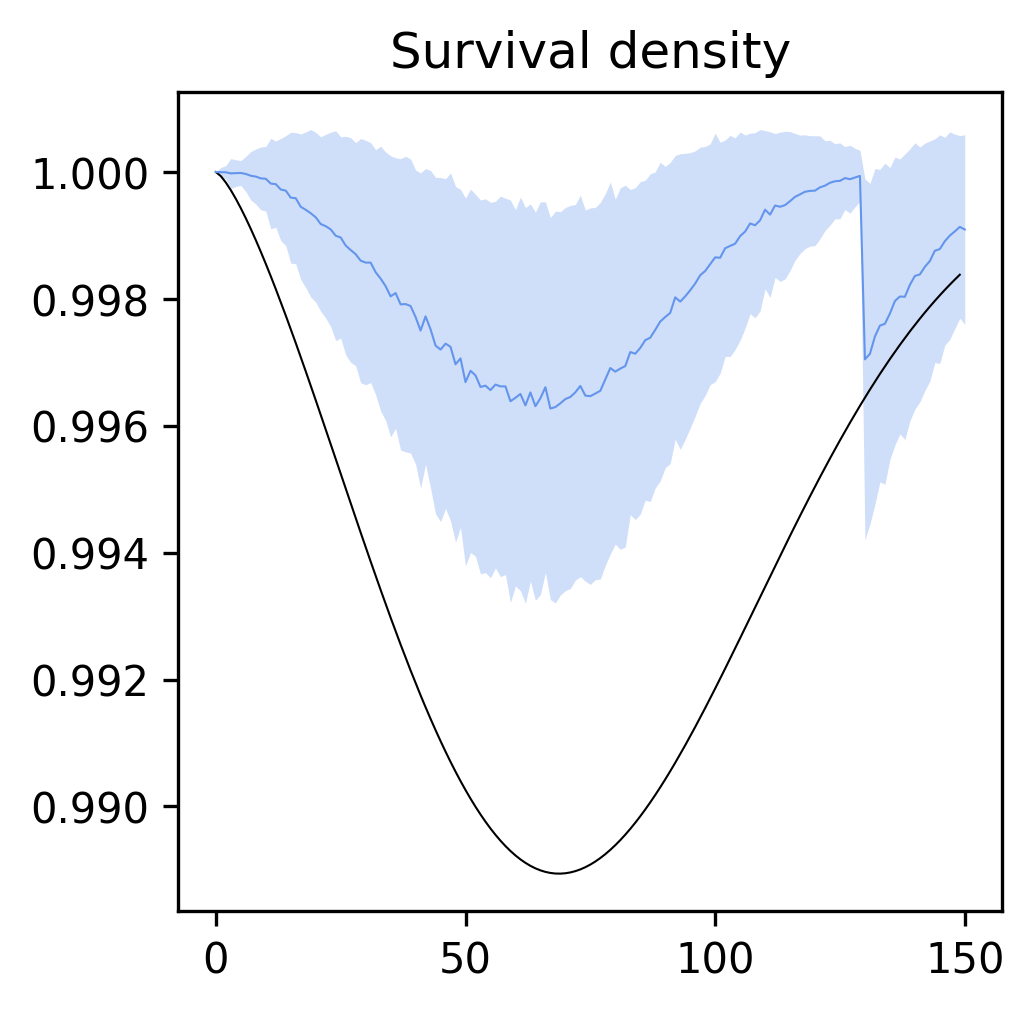

In [43]:
# Plot only survivals until the first failure for the initial set of pipes in the system 

# df_distributions["density_survival"] = df_distributions["frequency_survival"].divide(amount_pipes, fill_value=np.NaN)
for k, col_survival in df_distributions["frequency_survival"].items():
    
    df_distributions["density_survival"][k] = 1-((df_distributions["frequency_pipes"][k] - col_survival)/(amount_pipes))
df5 = df_distributions["density_survival"]

mean5 = df5.mean(axis=0)
std5 = df5.std(axis=0)
min5 = df5.min(axis=0)
max5 = df5.max(axis=0)
lb5 = mean5 - std5
ub5 = mean5 + std5

fig2, ax5 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig2.set_facecolor("white")
ax5.set_title("Survival density")

ax5.plot(range(150), survival_density, lw=0.5, color="black")
ax5.plot(range(max_age), mean5, color="cornflowerblue", lw=0.5)
ax5.fill_between(range(max_age), lb5, ub5, color="cornflowerblue", lw=0, alpha=0.3)
ax5.grid(False)


C:\Users\duquevna\AppData\Local\Temp\ipykernel_16288\3779673434.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, v in df_distributions["density_failure"].iteritems():


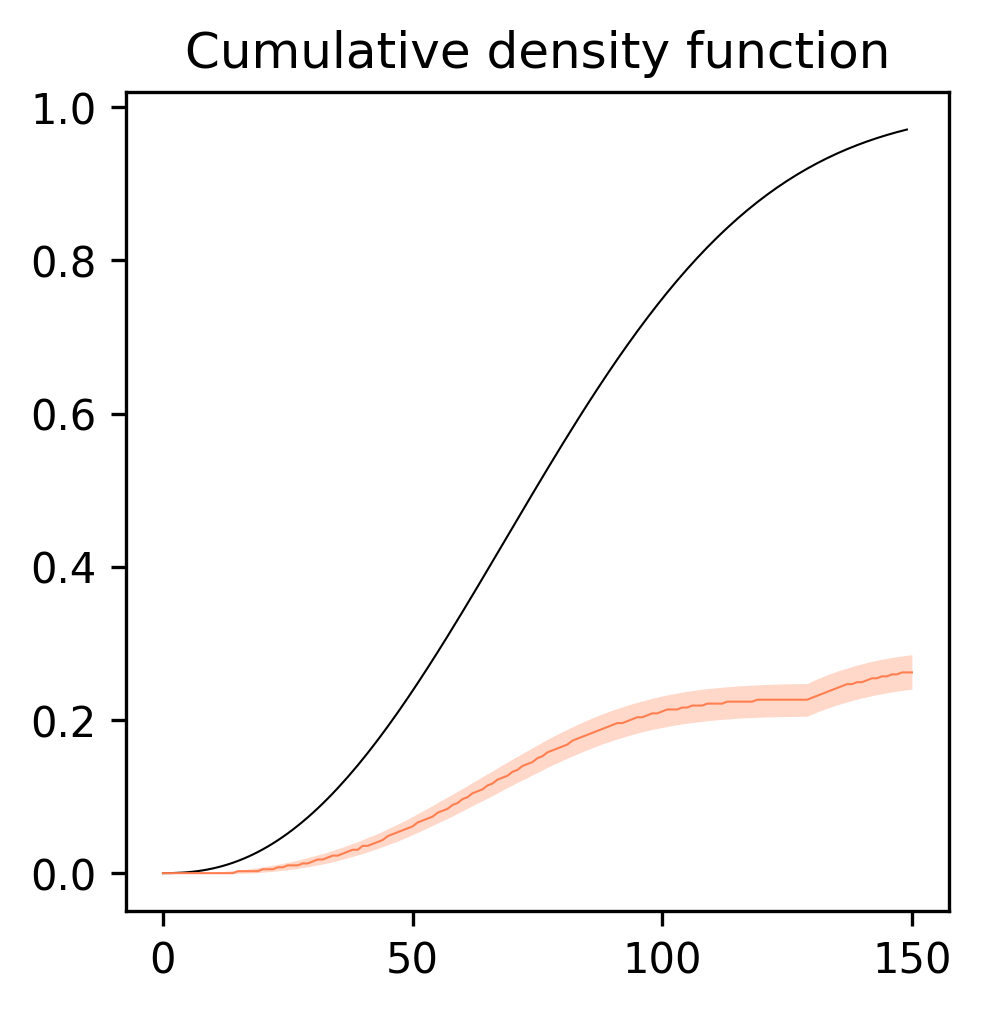

In [44]:
sum_=0
for k, v in df_distributions["density_failure"].iteritems():
    if  k-1==0:
        df_distributions["cumulative_failure"][k] = v
    else:
        sum_ += v
#         print(k, "\n", sum_)
        df_distributions["cumulative_failure"][k] = sum_

# print(df_distributions["cumulative_failure"][71])

df6 = df_distributions["cumulative_failure"]
# print(df_distributions["cumulative_failure"])

#calculate across the columns 
mean6 = df6.mean(axis=0)
median6 = df6.median(axis=0)
std6 = df6.std(axis=0)
min6 = df6.min(axis=0)
max6 = df6.max(axis=0)
lb6 = mean6 - std6
ub6 = mean6 + std6


fig6, ax6 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig6.set_facecolor("white")

ax6.set_title("Cumulative density function")

ax6.plot(range(150), weibull_cumulative_curve[:150], lw=0.5, color="black")

boxprops = dict(linestyle='-', linewidth=0.5, facecolor= "coral", edgecolor= "white", alpha=0.5)
capprops = dict(linestyle='-', linewidth=0.5, color='coral', alpha=0.8)
whiskerprops = dict(linestyle='-', linewidth=0.5, color='coral', alpha=0)
flierprops = dict(marker='o', markersize=2, markeredgecolor='none', markerfacecolor='coral', alpha=0.4)
medianprops = dict(linestyle='-.', linewidth=0.5, color='white')
meanprops = dict(marker='+',linestyle='-', markersize=3, markeredgecolor='none', markerfacecolor='blue')
# BP = ax6.boxplot(df6,  
#             notch=True, 
#             showfliers=True, 
#             meanline=True, 
#             showmeans=True, 
#             patch_artist=True, 
#             boxprops=boxprops, 
#             meanprops=meanprops, 
#             medianprops=medianprops, 
#             capprops=capprops, 
#             whiskerprops=whiskerprops, 
#             flierprops=flierprops)

ax6.plot(range(max_age), median6, color="coral", lw=0.5)
ax6.fill_between(range(max_age), lb6, ub6, color="coral", lw=0, alpha=0.3)
ax6.grid(False)

# x_labes = max(len(df6.columns), max_age)+5
# x_pos = np.arange(x_labes, step=np.round(x_labes/5,0))
# ax6.set_xticks(x_pos)



C:\Users\duquevna\AppData\Local\Temp\ipykernel_16288\285193394.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, v in df_distributions["density_failure"].iteritems():


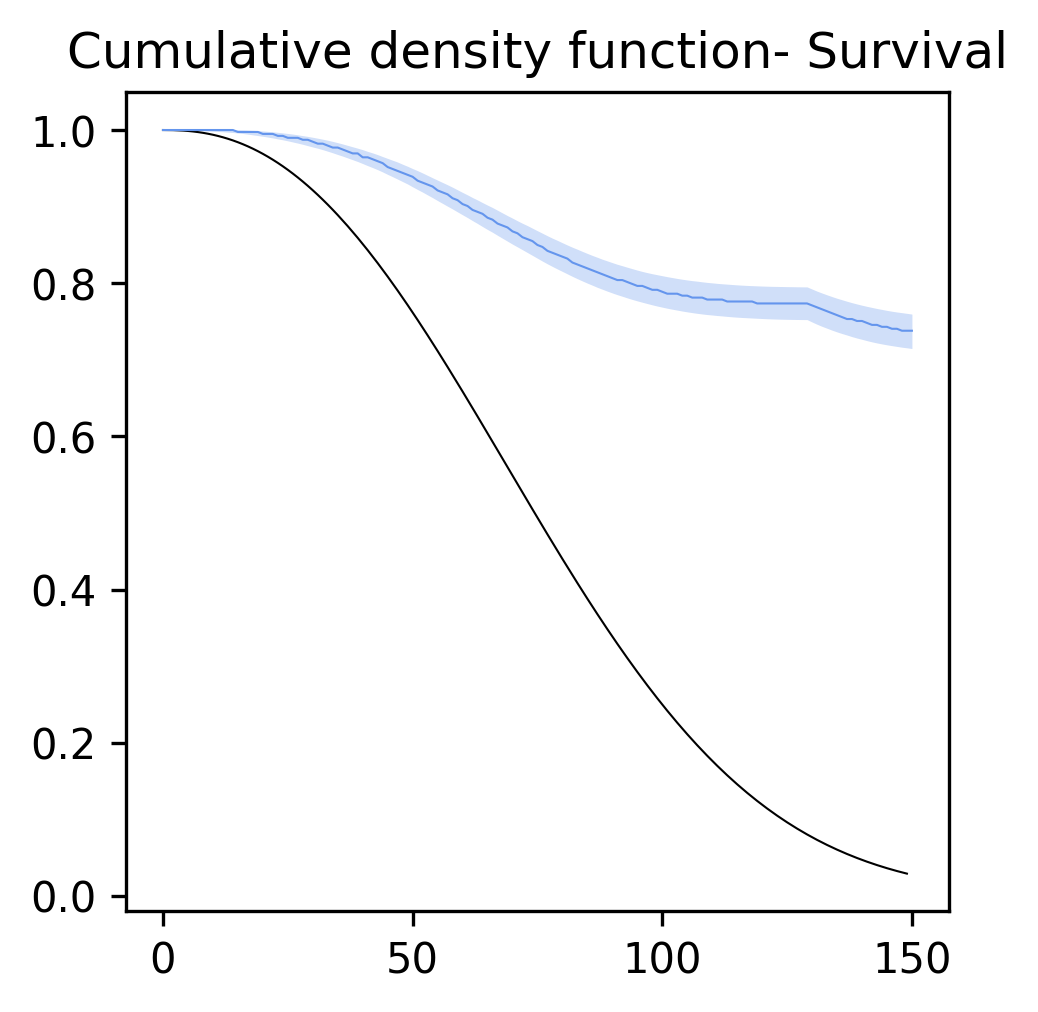

In [45]:
sum_ = 0
for k, v in df_distributions["density_failure"].iteritems():
    if k - 1 == 0:

        df_distributions["cumulative_survival"][k] = 1 - v
    else:
        sum_ += v

        df_distributions["cumulative_survival"][k] = 1 - sum_


# print(df_distributions["cumulative_failure"][71])

df6 = df_distributions["cumulative_survival"]
# print(df_distributions["cumulative_failure"])

#calculate across the columns 
mean6 = df6.mean(axis=0)
median6 = df6.median(axis=0)
std6 = df6.std(axis=0)
min6 = df6.min(axis=0)
max6 = df6.max(axis=0)
lb6 = mean6 - std6
ub6 = mean6 + std6


fig6, ax6 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig6.set_facecolor("white")

ax6.set_title("Cumulative density function- Survival")

ax6.plot(range(150), survival_curve[:150], lw=0.5, color="black")
# ax6.plot(range(150), cum_lst[:150], lw=0.5, color="red")

boxprops = dict(linestyle='-', linewidth=0.5, facecolor= "coral", edgecolor= "white", alpha=0.5)
capprops = dict(linestyle='-', linewidth=0.5, color='coral', alpha=0.8)
whiskerprops = dict(linestyle='-', linewidth=0.5, color='coral', alpha=0)
flierprops = dict(marker='o', markersize=2, markeredgecolor='none', markerfacecolor='coral', alpha=0.4)
medianprops = dict(linestyle='-.', linewidth=0.5, color='white')
meanprops = dict(marker='+',linestyle='-', markersize=3, markeredgecolor='none', markerfacecolor='blue')
# BP = ax6.boxplot(df6,  
#             notch=True, 
#             showfliers=True, 
#             meanline=True, 
#             showmeans=True, 
#             patch_artist=True, 
#             boxprops=boxprops, 
#             meanprops=meanprops, 
#             medianprops=medianprops, 
#             capprops=capprops, 
#             whiskerprops=whiskerprops, 
#             flierprops=flierprops)

ax6.plot(range(max_age), median6, color="cornflowerblue", lw=0.5)
ax6.fill_between(range(max_age), lb6, ub6, color="cornflowerblue", lw=0, alpha=0.3)
ax6.grid(False)

# x_labes = max(len(df6.columns), max_age)+5
# x_pos = np.arange(x_labes, step=np.round(x_labes/5,0))
# ax6.set_xticks(x_pos)


In [46]:
type_dist = "frequency"
label="failures"
key=type_dist + "_" + label
key

'frequency_failures'

Plot distributions

In [47]:

def plot_distributions(dataframe, type_dist="frequency", label="failure", color="blue", reference_data=[[1, 55, 75, 100, 135],[0, 0.25, 0.50, 0.75, 0.99]], distribution="Weibull", years_tot_sim=years_tot_sim, verbose=False):

    """ Build FREQUENCIES the plot"""
    min_values = []
    max_values = []
    avg_values = []
    std_values = []
    
    key=type_dist + "_" + label
    
    for idx, f in dataframe[key].iteritems():
        min_values.append(min(dataframe[key][idx]))
        max_values.append(max(dataframe[key][idx]))
        avg_values.append(np.mean(dataframe[key][idx]))
        std_values.append(np.std(dataframe[key][idx]))
    totals = dataframe[key].sum(axis=1)
    
    lower_bound=[]
    upper_bound=[]
    for item1, item2 in zip(avg_values, std_values):
        lower_bound.append(item1 - item2)
        upper_bound.append(item1 + item2)

   
    "Fit input distribution"            
    __d_ages = np.array(reference_data[0])   # Reference quantile values from master thesis of Arreaza Bauer (2011)
    __d_failures = np.array(reference_data[1])  # Reference quantiles

    param_optimal, param_covariance = curve_fit(f=weibull_cumulative_function, xdata=__d_ages, ydata=__d_failures)
    verbose_(f"{distribution}: parameters {param_optimal}; covariance {param_covariance}", verbose=verbose)

    a = param_optimal[0]  # first parameter from the fitting process
    b = param_optimal[1]  # second parameter from the fitting process


    # Build the plot
    
    fig1, ax = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
    fig1.set_facecolor("white")
    
    
    x= dataframe[key].columns
    y= avg_values
    ax.bar(x, y, align='center', alpha=0.3, color="grey", label=label.capitalize())
    
    ax.set_xlabel('Age [years]')
    x_pos = np.arange(len(x), step=np.round(len(x)/5,0))
    ax.set_xticks(x_pos)
    
    if type_dist.lower().startswith('f'):
        ax.set_title('Frequency distribution')
        ax.set_ylabel(f'Frequency of {label} [# pipes]')
        
    elif type_dist.lower().startswith('d'):
        ax.set_title('Probability density function')
        ax.set_ylabel(f'Probability of failure [-]')  
        
        if "fail" in label.lower():
            "Plot input proability density distribution"
            failure_fit = dict([(i, weibull_density_function(i, a, b)) for i in range(max(__d_ages)+1)])         
            ax.plot(failure_fit.keys(), failure_fit.values(), c='black', linestyle='-', linewidth=0.5, mfc='none', label=f"Reference curve [a:{round(a,2)} b:{round(b,2)}]")
        if "surv" in label.lower():
            "Plot input proability density distribution"
            survival_fit = dict([(i, weibull_survival_density_function(i, a, b)) for i in range(max(__d_ages)+1)])         
            ax.plot(survival_fit.keys(), survival_fit.values(), c='black', linestyle='-', linewidth=0.5, mfc='none', label=f"Reference curve [a:{round(a,2)} b:{round(b,2)}]")
        
    elif type_dist.lower().startswith('c'):
        
        if "fail" in label.lower():
            verbose_("FAILURE PlOT", verbose=verbose)
            ax.set_title('Cumulative density function')
            ax.set_ylabel('Cumulative probability [-]')
                        
            "Plot input cumulative distribution"
            failure_fit = dict([(i, weibull_cumulative_function(i, a, b)) for i in range(max(__d_ages)+1)])
            ax.plot(__d_ages, __d_failures, c='black', marker='s', markersize=4, linestyle="", linewidth=0.5, mfc='none', label="Reference points")       
            ax.plot(failure_fit.keys(), failure_fit.values(), c='black', linestyle='-', linewidth=0.5, mfc='none', label=f"Reference curve [a:{round(a,2)} b:{round(b,2)}]")
            
            "plot fitted curve based on histogram"
            x = list(dataframe[key].columns)
            y = avg_values           
            param_optimal, param_covariance = curve_fit(f=weibull_cumulative_function, xdata=x, ydata=y, p0=[a, b], maxfev=1000)
            verbose_(f"{distribution}: parameters {param_optimal}; covariance {param_covariance}", verbose=verbose)

            a = param_optimal[0]  # first parameter from the fitting process
            b = param_optimal[1]  # second parameter from the fitting process
        
            failure_curve = [weibull_cumulative_function(k, a, b) for k in x]  
            ax.plot(x, failure_curve, c='slategrey', alpha=1, linestyle='-', linewidth=0.5, label=f"Fitted curve [a:{round(a,2)} b:{round(b,2)}]")
            failure_fit2 = dict([(i, weibull_cumulative_function(i, param_optimal[0], param_optimal[1])) for i in x])
            
            
            x_labes = max(len(dataframe[key].columns), max(__d_ages))
            x_pos = np.arange(x_labes+5,step=np.round(x_labes/5,0))
#             x_pos = np.arange(max_age+5, step=np.round((max_age)/5, 0))
            ax.set_xticks(x_pos)
#             ax.set_xticklabels(dataframe[key].columns)
            
        if "surv" in label.lower():
            verbose_("SuRVIVAL PlOT", verbose=verbose)
            ax.set_title('Survival curve')
            ax.set_ylabel(f'Probability of survival [-]')
            
            "Plot input cumulative distribution"
            survival_fit = dict([(i, weibull_survival_function(i, a, b)) for i in range(max(__d_ages)+1)])                    
            ax.plot(survival_fit.keys(), survival_fit.values(), c='black', linestyle='-', linewidth=0.5, mfc='none', label=f"Reference curve [a:{round(a,2)} b:{round(b,2)}]")
            
            "plot fitted curve based on histogram"
            x = list(dataframe[key].columns)
            y = avg_values
            
            param_optimal, param_covariance = curve_fit(f=weibull_survival_function, xdata=x, ydata=y, p0=[a, b], maxfev=1000)
            verbose_(f"{distribution}: parameters {param_optimal}; covariance {param_covariance}", verbose=verbose)
            a = param_optimal[0]  # first parameter from the fitting process
            b = param_optimal[1]  # second parameter from the fitting process
        
            survival_curve = [weibull_survival_function(k, a, b) for k in x]
           
            ax.plot(x, survival_curve, c='slategrey', alpha=1, linestyle='-', linewidth=0.5, label=f"Fitted curve [a:{round(a,2)} b:{round(b,2)}]")
            
            x_labes = max(len(dataframe[key].columns), max(__d_ages))
            x_pos = np.arange(x_labes+5,step=np.round(x_labes/5,0))
#             x_pos = np.arange(max_age+5, step=np.round((max_age)/5, 0))
            ax.set_xticks(x_pos)
#             ax.set_xticklabels(dataframe[key].columns)
            
    else:
            verbose_("type_dist should be 'frequency', 'density', 'cumulative'")
    
    
    
    
    
#     z = np.polyfit(x, y, 2)
#     p = np.poly1d(z)
#     plt.plot(x,p(x),"r--")
    ax.plot(x, y, color=color, linewidth=0.5, label="Average")
    ax.fill_between(x, lower_bound, upper_bound, alpha=0.3, linewidth=0, color=color, label="Standard deviation")
    
    
    
    ax.legend(loc="best",fontsize=5)
    ax.grid(True, alpha=0.5)
    # Save the figure and show
    plt.tight_layout()
    
    plt.show()
    # fig1.savefig(fr"C:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\test/figures/P2_({dataframe[key].shape[0]}-{dataframe[key].shape[1]})[{years_tot_sim}]_{type_dist}_{label}.png", dpi=900)

    return True

In [48]:
plot_distributions(df_distributions, type_dist="frequency", label="failed", color="coral")

KeyError: 'frequency_failed'

In [ ]:
plot_distributions(df_distributions, type_dist="frequency", label="survived", color="cornflowerblue")

In [ ]:
plot_distributions(df_distributions, type_dist="frequency", label="pipes", color="purple")

In [ ]:
df_distributions["density_failure"].sum(axis=1)


In [ ]:
plot_distributions(df_distributions, type_dist="density", label="failure", color="coral")

In [ ]:
plot_distributions(df_distributions, type_dist="density", label="survival", color="cornflowerblue")

In [ ]:
plot_distributions(df_distributions, type_dist="cumulative", label="failure", color="coral")

In [ ]:
plot_distributions(df_distributions, type_dist="cumulative", label="survival", color="cornflowerblue")

# Deterioration model 

In [49]:
# region --- PYTHON LIBRARY IMPORTS ---
import sys
sys.path.append('../..')

import time
from math import *
from pathlib import Path
from random import randint, seed
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.colors as colors
from scipy.optimize import curve_fit
%matplotlib inline
# --- Spatial geometry ---
from shapely.geometry import Point, Polygon, LineString

# --- SND IMPORTS ---
# from help_functions.helper_functions import verbose_, cm2inch, truncate_colormap, set_file_name
# from algorithm import *
from ssnd.defaults import *
from ssnd.help_functions.helper_functions import *
from ssnd.help_functions.plot_maps import *
# from deterioration import *
#endregion 


module="deterioration"
read_module = "hydraulic_design"

case_study = case_study
connectivity = connectivity

verbose = True  # set to TRUE for debugging
notify = True   # set to TRUE to track the progress


input_path = DATA_DIR/case_study/"output/shp"
output_path = DATA_DIR /case_study/"output"

blocks_dict=dict()
pipes_dict = dict()


## Fit curve

In [50]:
def weibull_cumulative_function(x:np.array, a:float, b:float):
    """ The Weibull distribution is a continuous probability distribution.
        [Source: (Scheidegger (2013))]

    Args:
        x (np.array): _description_
        a (float): scale
        b (float): shape

    Returns:
        _type_: _description_
    """       

    """ 

    :param x: array of pipe ages (variable)
    :param a: scale parameter (sets the growth rate)
    :param b: shape parameter (sets the displacement along the x-axis (translates the graph to the left or right)
    :return:
    """
    # For x ≥ 0, and F(x; k; λ) = 0 for x < 0.

    return np.where(x > 0, 1 - np.exp(-(x / a) ** b), 0)

In [51]:
"Fit input distribution"  

__d_ages = np.array(d_ages)   # Reference quantile values from master thesis of Arreaza Bauer (2011)
__d_failures = np.array(d_failures)  # Reference quantiles

param_optimal, param_covariance = curve_fit(f=weibull_cumulative_function, xdata=__d_ages, ydata=__d_failures)
verbose_(f"{distribution}: parameters {param_optimal}; covariance {param_covariance}", verbose=verbose)

# Parameters for deterioration model
a = param_optimal[0]
b = param_optimal [1]



Weibull: parameters [86.8254304   2.71860776]; covariance [[ 1.45346304 -0.04219712]
 [-0.04219712  0.02404958]]


In [52]:
a,b

(86.82543040068839, 2.7186077583351227)

## Functions

In [53]:
tot_simulation_year  = year_ph - year_o
tot_simulation_year

210

Probability Density function PDF

Text(0.5, 1.0, 'Weibull density function')

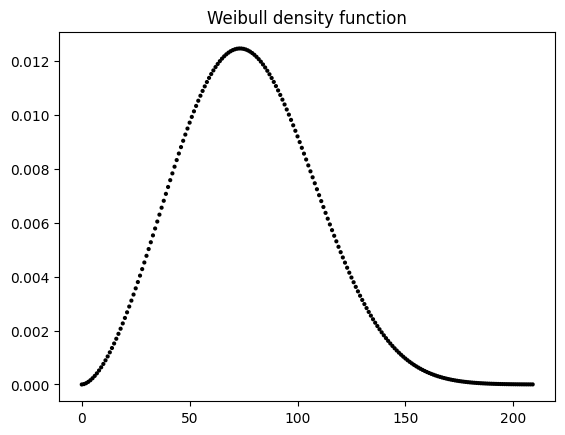

In [54]:
def weibull_density_function(x, a, b):
    """_summary_

    Args:
        x (_type_): _description_
        a (_type_): scale
        b (_type_): shape

    Returns:
        _type_: _description_
    """
    k = (1/a)**b 
    return np.where(x > 0, k*b*(x**(b-1))*(np.exp(-k*(x**b))), 0)

failure_density = [weibull_density_function(k, a=a, b=b) for k in range(tot_simulation_year)]

plt.scatter(x=range(tot_simulation_year), y=failure_density, marker=".", c="k", edgecolors="none")
plt.title(f"Weibull density function")

 ### cumulative probability density distribution

Text(0.5, 1.0, 'Weibull cumulative function')

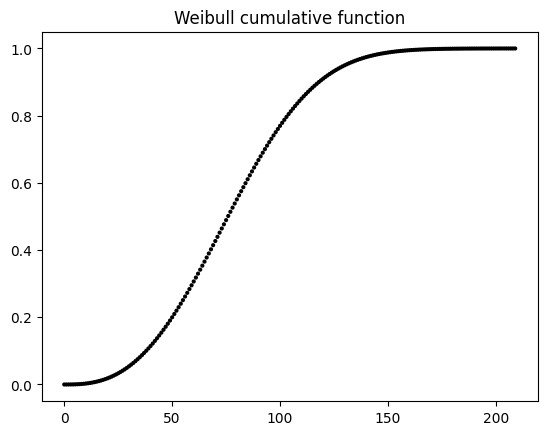

In [55]:

weibull_cumulative_curve = [weibull_cumulative_function(k, a=a, b=b) for k in range(tot_simulation_year)]
plt.scatter(x=range(tot_simulation_year), y=weibull_cumulative_curve, marker=".", c="k", edgecolors="none")
plt.title("Weibull cumulative function")

In [56]:
def cond_prob_failure_age (previous_age, current_age, a, b):
    """_summary_

    Args:
        previous_age (_type_): _description_
        current_age (_type_): _description_
        a (_type_): _description_
        b (_type_): _description_

    Returns:
        _type_: _description_
    """
    F0 = weibull_cumulative_function(previous_age, a, b)
    F1 = weibull_cumulative_function(current_age, a, b)
    p_cond_failure = (F1 - F0) / (1 - F0)
    return p_cond_failure

### Survival density function 

Text(0.5, 1.0, 'Weibull survival density function')

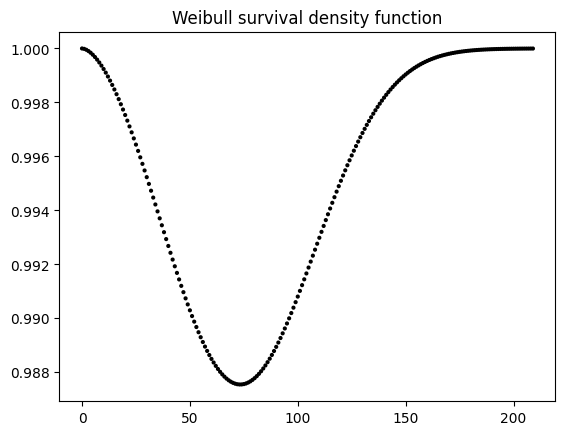

In [57]:
def weibull_survival_density_function(x, a, b):
    k = (1/a)**b 
    return np.where(x > 0, 1-(k*b*(x**(b-1))*(np.exp(-k*(x**b)))), 1)

survival_density = [weibull_survival_density_function(k, a=a, b=b) for k in range(tot_simulation_year)]
plt.scatter(x=range(tot_simulation_year), y=survival_density,marker=".", c="k", edgecolors="none")
plt.title("Weibull survival density function")

### Cumulative survival function

Text(0.5, 1.0, 'Weibull survival function')

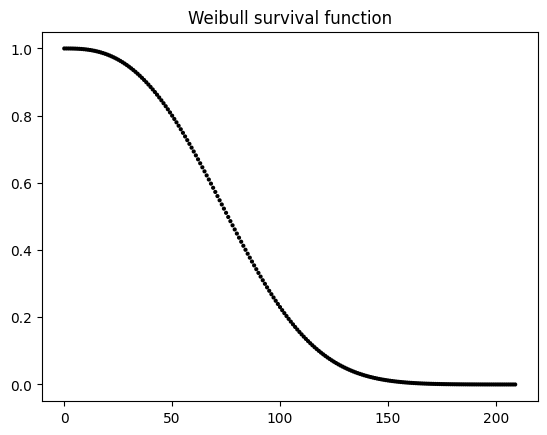

In [58]:
def weibull_survival_function(x, a, b):
 
    return np.where(x > 0, np.exp(-(x / a) ** b), 1.0)
survival_curve = [weibull_survival_function(k, a=a, b=b) for k in range(tot_simulation_year)]
plt.scatter(x=range(tot_simulation_year), y=survival_curve,marker=".", c="k", edgecolors="none")
plt.title("Weibull survival function")

## Define deterioration model

Define parameters

In [59]:
seed(random_seed)


iter_ = 0
iter_max = 10
# year=2038

year_i = year_i
year_o = year_o # initial year for the deterioration model - age distribution
year_ph = year_ph # planning horizon
year_f = year_f  # final year of simulation 

year_step= 5

# Parameters for deterioration model
a = a
b = b

In [60]:
a, b


(86.82543040068839, 2.7186077583351227)

### Read input files

In [61]:
bool_run_step_by_step =False

In [62]:
year=2018

In [63]:
""" READ INPUT FILE """
# Working path and input file
def read_geoDataFrame(data_path:Path, case_study:str, read_module:str, connectivity:str, name:str , year:int):
    """

    Args:
        input_path (Path): _description_
        case_study (str): _description_
        read_module (str): _description_
        connectivity (str): _description_
        year (int): _description_

    Returns:
        _type_: _description_
    """    
    
    path_df=data_path /read_module.lower()/connectivity.lower()/fr"{connectivity.lower()}_{case_study}_{name}_({year})/{connectivity.lower()}_{case_study}_{name}_({year}).shp"
    df = gpd.read_file(path_df)
   
    return df

Read hydraulic design and copy the design for previous or future years

In [64]:
input_path

WindowsPath('c:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/Data/data/Uster_200_200L/output/shp')

In [65]:
if bool_run_step_by_step: 
    years_designed = list(range(year_i, year_f+1,year_step))
    print(years_designed)

    for year in range(year_o, year_ph+1, year_step):

        
        # if replacement_strategy == "S1":  # copy design as it should be for every pipe over time 
        if year == year_o:
            blocks =  read_geoDataFrame(input_path, case_study, read_module=read_module, connectivity=connectivity, name=name_blocks, year=year_i)
            pipes =  read_geoDataFrame(input_path, case_study, read_module=read_module, connectivity=connectivity, name=name_pipes, year=year_i)
        if year in years_designed:
            blocks = read_geoDataFrame(input_path, case_study, read_module=read_module, connectivity=connectivity,name=name_blocks, year=year)
            pipes = read_geoDataFrame(input_path, case_study, read_module=read_module, connectivity=connectivity, name=name_pipes,year=year)
        

        # create new columns for deterioration module 
        blocks.loc[:, "age"] = 0
        blocks.loc[:, "p_fail"] = 0.0
        blocks.loc[:, "failed"] = 0
        
        pipes.loc[:, "age"] = 0
        pipes.loc[:, "p_fail"] = 0.0
        pipes.loc[:, "failed"] = 0
            
        blocks_dict[year] = blocks.copy()
        pipes_dict[year] = pipes.copy()

        print(year, len(pipes))
    

In [66]:
if bool_run_step_by_step: pipes_dict.keys()

In [67]:
if bool_run_step_by_step: pipes_dict[1888].loc[pipes_dict[1888]["failed"]==1,("PE_total", "diameter", "has_wwtp", "sww_length", "age", "p_fail", "failed")]

get previous year

In [68]:
def get_df_from_dict(blocks_dict, year, time_step=5, verbose:bool=False, notify:bool=True):
    verbose_("getting previous failure information ... ", verbose)
    
    previous_year = year - time_step    
    
    if previous_year in blocks_dict.keys(): 
        verbose_(f"{year}: getting information from previous year {previous_year}", verbose=verbose)   
        blocks_old =blocks_dict[previous_year]
    
    # if the previous year falls outside the range
    elif year in blocks_dict.keys():    
        verbose_(f"{year}: getting information from current year {year}", verbose=verbose)
        blocks_old =blocks_dict[year] # return current year
    
    return blocks_old

In [69]:
if bool_run_step_by_step:
    blocks_old = get_df_from_dict(blocks_dict, year=2008, time_step=year_step)
    print(len(blocks_old))

    pipes_old = get_df_from_dict(pipes_dict, year=2008, time_step=year_step)
    print(len(pipes_old))

In [70]:
if bool_run_step_by_step:
    seed(random_seed)
    for i in range(100):
        for j in range (10):
            print(randint(1, 10))
        
        for j in range (10):
            print(randint(1, 10))

pipes deterioration function

In [71]:
# Initialise pipe age for 2018

def pipes_deterioration(pipes_dict:dict, year_o:int, year_ph:int, year_step:int, a: float, b:float, times:list=None, verbose:bool=False):
    """_summary_

    Args:
        pipes_dict (dict): _description_
        year_o (int): _description_
        year_ph (int): _description_
        year_step (int): _description_
        a (float): _description_
        b (float): _description_
        times (list, optional): _description_. Defaults to None.
        verbose (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """    
    

    if not times:
        times = []


    seed(random_seed)
    for year in range(year_o, year_ph+1, year_step):
        # Start counting the execution time    
        st_ = float(time.time())
        
        pipes = pipes_dict[year]

        # warm-up starts at year_o with age=0
        if year == year_o: 
          
            previous_age=0   
            
            for idx, pipe in pipes.iterrows():
                
                age = pipes.loc[idx, "age"]
                p_cond_failure = cond_prob_failure_age (previous_age=previous_age, current_age=age, a=a, b=b) 
                pipes.loc[idx, "p_fail"] = float(p_cond_failure)
                
                # probability of failura given by a binomial distribution and the conditional probalitity 
                # of failure for each pipe p, with n is the number of trials (n=1)
                failure = np.random.binomial(n=1, p=p_cond_failure, size=None)   
                pipes.loc[idx, "failed"] = failure

            pipes_dict[year] = pipes
        
        else:
            
            pipes_old = get_df_from_dict(pipes_dict, year, time_step=year_step, verbose=verbose, notify=notify)

            for idx, pipe in pipes.iterrows():
                
                id_ = pipes.loc[idx, "BlockID"]

                # new pipe build in the current year with age=0
                if id_ not in list(pipes_old["BlockID"]):
                    current_age = 0 + year_step           # add the time step
                    pipes.loc[idx, "age"] =  current_age  # recently built
                    p_cond_failure = cond_prob_failure_age (previous_age=0, current_age=current_age, a=a, b=b)
                    pipes.loc[idx, "p_fail"] = float(p_cond_failure)
                    failure=np.random.binomial(n=1, p=p_cond_failure, size=None)
                    pipes.loc[idx, "failed"] = failure
                
                # existing pipe
                else: 
                    idx_old_pipe = pipes_old[pipes_old["BlockID"]==id_].index[0]
                    
                    previous_age = pipes_old.loc[idx_old_pipe, "age"]
                    
                    if pipes_old.loc[idx_old_pipe, "failed"] == 1:
                        current_age = 0 + year_step           # add the time step
                        pipes.loc[idx, "age"] = current_age  
                        
                        p_cond_failure = cond_prob_failure_age (previous_age=0, current_age=current_age, a=a, b=b)
                        pipes.loc[idx, "p_fail"] = float(p_cond_failure)

                        pipes.loc[idx, "failed"] = np.random.binomial(n=1, p=p_cond_failure, size=None)

                    else:
                        previous_age = pipes_old.loc[idx_old_pipe, "age"]
                        current_age = previous_age + year_step # add the time step
                        pipes.loc[idx, "age"] = current_age  

                        p_cond_failure = cond_prob_failure_age (previous_age=previous_age, current_age=current_age, a=a, b=b)
                        pipes.loc[idx, "p_fail"] = float(p_cond_failure)

                        pipes.loc[idx, "failed"] = np.random.binomial(n=1, p=p_cond_failure, size=None)       
            
            pipes_dict[year] = pipes.copy()
        
            # """ EXECUTION TIME """
            # annual_time = time.time() - st_
            # verbose_(f"\n annual time: {annual_time} s\n", notify)
            # times.append(annual_time)
        
    return pipes_dict, times

In [72]:
if bool_run_step_by_step: 
    pipes_dict, times = pipes_deterioration(pipes_dict,
                                        year_o=year_o, 
                                        year_ph=year_ph, 
                                        year_step=year_step,    
                                        a=a,    
                                        b=b)

Update blocks information

In [73]:
#update blocks info with deterioration pipes
def update_blocks_information(blocks_dict:gpd.GeoDataFrame,
                            pipes_dict:gpd.GeoDataFrame,
                            year_o:int=year_o, 
                            year_ph:int=year_ph,
                            columns:list=None):
    """_summary_

    Args:
        blocks_dict (gpd.GeoDataFrame): _description_
        pipes_dict (gpd.GeoDataFrame): _description_
        year_o (int, optional): _description_. Defaults to year_o.
        year_ph (int, optional): _description_. Defaults to year_ph.
        columns (list, optional): _description_. Defaults to None.

    Returns:
        _type_: _description_
    """
    for year in range(year_o, year_ph+1, year_step):
        blocks =  blocks_dict[year] 
        pipes = pipes_dict[year]    
        for idx, pipe in pipes.iterrows():
            pipe_id = pipes.loc[idx, "BlockID"]
            
            # get the corresponding block for the current pipe
            block =  blocks.loc[blocks["BlockID"] == pipe_id, "BlockID"]
            block_id = block.values[0]
            block_idx = block.index[0]
            # print(pipe_id, block_id, block_idx)

            if pipe_id == block_id:
                for c in columns:
                    blocks.loc[block_idx, c] = pipes.loc[idx, c]
                    # blocks.loc[block_idx, "age"] = pipes.loc[idx, "age"]
                    # blocks.loc[block_idx, "p_fail"] = pipes.loc[idx, "p_fail"]    
                    # blocks.loc[block_idx, "failed"] = pipes.loc[idx, "failed"]
            else:
                verbose_("IDs of Pipe and Block and different. Check! ")
            
            blocks_dict[year] = blocks.copy()
    return blocks_dict

In [74]:
if bool_run_step_by_step:
    n_columns=["age", "p_fail", "failed"]
    blocks_dict = update_blocks_information(blocks_dict,
                                        pipes_dict,
                                        year_o=year_o, 
                                        year_ph=year_ph,
                                        columns=n_columns)

In [75]:
if bool_run_step_by_step:
    year= 2008
    pipes= pipes_dict[year]
    print(len(pipes[pipes["failed"]==1]))
    pipes.loc[pipes["failed"]==1,("age", "p_fail", "failed")]

In [76]:
if bool_run_step_by_step:
    blocks= blocks_dict[year]
    print(len(blocks[blocks["failed"]==1]))
    blocks.loc[blocks["failed"]==1,("age", "p_fail", "failed")]

In [77]:
if bool_run_step_by_step:
    pipes_dict[year].loc[pipes_dict[year]["failed"]>0]

In [78]:
if bool_run_step_by_step:
    x=np.empty(len(pipes_dict.keys()))
    y=np.empty(len(pipes_dict.keys()))
    failed_pipes_df = gpd.GeoDataFrame()
    total=0
    checked_ids = []
    for i, year in enumerate(pipes_dict.keys()):
        x[i] = year
        failed_amount= sum(pipes_dict[year].loc[:, "failed"])
        y[i] = failed_amount
        print(year, failed_amount)
        total+=failed_amount

        pipes = pipes_dict[year].loc[pipes_dict[year]["failed"]>0].copy()
        for idx, pipe in pipes.iterrows():
            pipe_id = pipes.loc[idx, "BlockID"]
            #print(pipes.loc[[idx]])
            
            if pipe_id not in checked_ids:
                failed_pipes_df = pd.concat((failed_pipes_df, pipes.loc[[idx]]), ignore_index=True)
        
            checked_ids = list(failed_pipes_df.loc[:, "BlockID"])
        #display(failed_pies_df)
        



In [79]:
if bool_run_step_by_step: failed_pipes_df

In [80]:
if bool_run_step_by_step:
    ages, frequencies = np.unique(failed_pipes_df.loc[:, "age"], return_counts=True)
    pl.plot(ages,frequencies)

In [81]:
if bool_run_step_by_step:
    densities=frequencies/410
    pl.plot(ages,densities)

In [82]:
if bool_run_step_by_step:
    sum_=0
    cumulatives = []
    for k, v in enumerate(densities):
        if  k-1==0:
            cumulatives.append(v)
        else:
            sum_ += v
    #         print(k, "\n", sum_)
            cumulatives.append(sum_)

In [83]:
if bool_run_step_by_step:
    pl.plot(ages,cumulatives)

In [84]:
if bool_run_step_by_step:
    plt.bar(x,y,width=4.5, label="")
    x_development = range(year_i, year_f+1, year_step)

    idx_x = np.in1d(x, x_development)
    print (idx_x)
    y_develompent = y[idx_x]
    plt.bar(x= x_development,height=y_develompent, width=4.5, label="Simulation period")
    plt.legend()
    plt.ylabel("Amount of failed pipes")
    plt.xlabel("Year")
    plt.title(f"Amount of failed pipes \n{connectivity} system")


In [85]:
if bool_run_step_by_step:
    blocks.plot(column="failed", cmap=pl.cm.Accent)

Plot distributions

In [86]:
def plot_distributions(dataframe, type_dist="frequency", label="failure", color="blue", 
                       reference_data=[[1, 55, 75, 100, 135],[0, 0.25, 0.50, 0.75, 0.99]], 
                       distribution="Weibull", 
                       years_tot_sim=0, 
                       verbose=False):

    """ Build FREQUENCIES the plot"""
    min_values = []
    max_values = []
    avg_values = []
    std_values = []
    
    key=type_dist + "_" + label
    
    for idx, f in dataframe[key].iteritems():
        min_values.append(min(dataframe[key][idx]))
        max_values.append(max(dataframe[key][idx]))
        avg_values.append(np.mean(dataframe[key][idx]))
        std_values.append(np.std(dataframe[key][idx]))
    totals = dataframe[key].sum(axis=1)
    
    lower_bound=[]
    upper_bound=[]
    for item1, item2 in zip(avg_values, std_values):
        lower_bound.append(item1 - item2)
        upper_bound.append(item1 + item2)

   
    "Fit input distribution"            
    __d_ages = np.array(reference_data[0])   # Reference quantile values from master thesis of Arreaza Bauer (2011)
    __d_failures = np.array(reference_data[1])  # Reference quantiles

    param_optimal, param_covariance = curve_fit(f=weibull_cumulative_function, xdata=__d_ages, ydata=__d_failures)
    verbose_(f"{distribution}: parameters {param_optimal}; covariance {param_covariance}", verbose=verbose)

    a = param_optimal[0]  # first parameter from the fitting process
    b = param_optimal[1]  # second parameter from the fitting process


    # Build the plot
    
    fig1, ax = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
    fig1.set_facecolor("white")
    
    
    x= dataframe[key].columns
    y= avg_values
    ax.bar(x, y, align='center', alpha=0.3, color="grey", label=label.capitalize())
    
    ax.set_xlabel('Age [years]')
    x_pos = np.arange(len(x), step=np.round(len(x)/5,0))
    ax.set_xticks(x_pos)
    
    if type_dist.lower().startswith('f'):
        ax.set_title('Frequency distribution')
        ax.set_ylabel(f'Frequency of {label} [# pipes]')
        
    elif type_dist.lower().startswith('d'):
        ax.set_title('Probability density function')
        ax.set_ylabel(f'Probability of failed pipes [-]')  
        
        if "fail" in label.lower():
            "Plot input proability density distribution"
            failure_fit = dict([(i, weibull_density_function(i, a, b)) for i in range(max(__d_ages)+1)])         
            ax.plot(failure_fit.keys(), failure_fit.values(), c='black', linestyle='-', linewidth=0.5, mfc='none', label=f"Reference curve [a:{round(a,2)} b:{round(b,2)}]")
        if "surv" in label.lower():
            "Plot input proability density distribution"
            survival_fit = dict([(i, weibull_survival_density_function(i, a, b)) for i in range(max(__d_ages)+1)])         
            ax.plot(survival_fit.keys(), survival_fit.values(), c='black', linestyle='-', linewidth=0.5, mfc='none', label=f"Reference curve [a:{round(a,2)} b:{round(b,2)}]")
        
    elif type_dist.lower().startswith('c'):
        
        if "fail" in label.lower():
            verbose_("FAILURE PlOT", verbose=verbose)
            ax.set_title('Cumulative density function')
            ax.set_ylabel('Cumulative probability of failed pipes[-]')
                        
            "Plot input cumulative distribution"
            failure_fit = dict([(i, weibull_cumulative_function(i, a, b)) for i in range(max(__d_ages)+1)])
            ax.plot(__d_ages, __d_failures, c='black', marker='s', markersize=4, linestyle="", linewidth=0.5, mfc='none', label="Reference points")       
            ax.plot(failure_fit.keys(), failure_fit.values(), c='black', linestyle='-', linewidth=0.5, mfc='none', label=f"Reference curve [a:{round(a,2)} b:{round(b,2)}]")
            
            "plot fitted curve based on histogram"
            x = list(dataframe[key].columns)
            y = avg_values           
            param_optimal, param_covariance = curve_fit(f=weibull_cumulative_function, xdata=x, ydata=y, p0=[a, b], maxfev=1000)
            verbose_(f"{distribution}: parameters {param_optimal}; covariance {param_covariance}", verbose=verbose)

            a = param_optimal[0]  # first parameter from the fitting process
            b = param_optimal[1]  # second parameter from the fitting process
        
            failure_curve = [weibull_cumulative_function(k, a, b) for k in x]  
            ax.plot(x, failure_curve, c='slategrey', alpha=1, linestyle='-', linewidth=0.5, label=f"Fitted curve [a:{round(a,2)} b:{round(b,2)}]")
            failure_fit2 = dict([(i, weibull_cumulative_function(i, param_optimal[0], param_optimal[1])) for i in x])
            
            
            x_labes = max(len(dataframe[key].columns), max(__d_ages))
            x_pos = np.arange(x_labes+5,step=np.round(x_labes/5,0))
#             x_pos = np.arange(max_age+5, step=np.round((max_age)/5, 0))
            ax.set_xticks(x_pos)
#             ax.set_xticklabels(dataframe[key].columns)
            
        if "surv" in label.lower():
            verbose_("SuRVIVAL PlOT", verbose=verbose)
            ax.set_title('Survival curve')
            ax.set_ylabel(f'Probability of survival of pipes [-]')
            
            "Plot input cumulative distribution"
            survival_fit = dict([(i, weibull_survival_function(i, a, b)) for i in range(max(__d_ages)+1)])                    
            ax.plot(survival_fit.keys(), survival_fit.values(), c='black', linestyle='-', linewidth=0.5, mfc='none', label=f"Reference curve [a:{round(a,2)} b:{round(b,2)}]")
            
            "plot fitted curve based on histogram"
            x = list(dataframe[key].columns)
            y = avg_values
            
            param_optimal, param_covariance = curve_fit(f=weibull_survival_function, xdata=x, ydata=y, p0=[a, b], maxfev=1000)
            verbose_(f"{distribution}: parameters {param_optimal}; covariance {param_covariance}", verbose=verbose)
            a = param_optimal[0]  # first parameter from the fitting process
            b = param_optimal[1]  # second parameter from the fitting process
        
            survival_curve = [weibull_survival_function(k, a, b) for k in x]
           
            ax.plot(x, survival_curve, c='slategrey', alpha=1, linestyle='-', linewidth=0.5, label=f"Fitted curve [a:{round(a,2)} b:{round(b,2)}]")
            
            x_labes = max(len(dataframe[key].columns), max(__d_ages))
            x_pos = np.arange(x_labes+5,step=np.round(x_labes/5,0))
#             x_pos = np.arange(max_age+5, step=np.round((max_age)/5, 0))
            ax.set_xticks(x_pos)
#             ax.set_xticklabels(dataframe[key].columns)
            
    else:
            verbose_("type_dist should be 'frequency', 'density', 'cumulative'")
    
    
    
    
    
#     z = np.polyfit(x, y, 2)
#     p = np.poly1d(z)
#     plt.plot(x,p(x),"r--")
    ax.plot(x, y, color=color, linewidth=0.5, label="Average")
    ax.fill_between(x, lower_bound, upper_bound, alpha=0.3, linewidth=0, color=color, label="Standard deviation")
    
    
    
    ax.legend(loc="best",fontsize=5)
    ax.grid(True, alpha=0.5)
    # Save the figure and show
    plt.tight_layout()
    
    plt.show()
    # fig1.savefig(fr"C:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\test/figures/P2_({dataframe[key].shape[0]}-{dataframe[key].shape[1]})[{years_tot_sim}]_{type_dist}_{label}.png", dpi=900)

    return True

In [87]:
# columns = [year_ - year_o for year_ in pipes_dict.keys()]
# df_deterioration = pd.DataFrame(columns = columns)

In [88]:
# df_deterioration

In [89]:
if bool_run_step_by_step: pipes_dict

In [90]:
if bool_run_step_by_step:
    min_age = 9999
    max_age = 0

    for i, year in enumerate(pipes_dict.keys()):
        x[i] = year
        min_age= min(min_age, min(pipes_dict[year].loc[:, "age"]))
        max_age= max(max_age, max(pipes_dict[year].loc[:, "age"]))
        y[i] = min_age
        print(year, min_age, max_age)

In [91]:
if bool_run_step_by_step: min_age, max_age

In [92]:
if bool_run_step_by_step:
    df__ = pd.DataFrame(index=range(1), data=0, columns=range(min_age, max_age+1, year_step))


    # Prepare empty dictionaries
    df_distributions = dict([(k, df__.copy()) for k in ["frequency_failure",
                                                        "frequency_survival", 
                                                        "frequency_pipes", 
                                                        "density_failure",
                                                        "density_survival", 
                                                        "cumulative_failure",                                                     
                                                        "cumulative_survival",                                                    ]])

In [93]:
if bool_run_step_by_step: df_distributions["frequency_failure"]

In [94]:
if bool_run_step_by_step: blocks_dict[year].loc[blocks_dict[year]["failed"]==1,("age", "p_fail", "failed")]

In [95]:
if bool_run_step_by_step:
    # LOOP PER SIMULATION RUN
    iter = 0
    first_failure_recorded = []

    frequency_failure = dict([(k, 0) for k in range(min_age, max_age +1, year_step)])
    frequency_survival = dict([(k, 0) for k in range(min_age, max_age +1, year_step)])
    frequency_pipes = dict([(k, 0) for k in range(min_age, max_age + 1, year_step)])

    for year in pipes_dict.keys():

        pipes = pipes_dict[year]

        amount_pipes = pipes.shape[0]
        

        for idx, pipe in pipes.iterrows():

            pipe_id = pipes.loc[idx, "BlockID"]

            #for year in range(year_i, year_f + 1):
            # print(idx, year, pipe[f'age_{year}'], pipe[f'failed_{year}'])

            age = pipe[f'age']

            if pipe_id not in first_failure_recorded:
                if pipe[f'failed'] == 1:

                    frequency_pipes[age] += 1
                    frequency_failure[age] += 1

                    first_failure_recorded.append(pipe_id)
                    
                    
                else:

                    frequency_pipes[age] += 1
                    frequency_survival[age] += 1
                    

    ## ------Finished loop through the pipes
        
    # Save to dataframes
    for age in range(min_age, max_age+1, year_step):

        df_distributions["frequency_failure"].loc[iter, age] = frequency_failure[age]  # save failing pipes in the DataFrame
        df_distributions["frequency_survival"].loc[iter, age] = frequency_survival[age]  # save surviving pipes in the DataFrame
        df_distributions["frequency_pipes"].loc[iter, age] = frequency_pipes[age]  # save surviving pipes in the DataFrame
        
 

In [96]:
# # LOOP PER SIMULATION RUN
# iter = 0
    
# for file in result_dir.iterdir():

#     st = file.name
    
#     if "[" in st and st.startswith(connectivity) and name_pipes in st:
#         print(st)
#         iter = int(st[st.find("[") + 1 : st.rfind("]")])
#     else:
#         continue 
    
#     if iter >= 5:
#         continue

#     pipes = pd.read_csv(file, sep=";", header=0, usecols=["BlockID", "age", "failed"])  # Get dataframe

#     amount_pipes = pipes.shape[0]

#     frequency_failure = dict([(k, 0) for k in range(min_age, max_age +1, year_step)])
#     frequency_survival = dict([(k, 0) for k in range(min_age, max_age +1, year_step)])
#     frequency_pipes = dict([(k, 0) for k in range(min_age, max_age + 1, year_step)])

#     for idx, pipe in pipes.iterrows():
#         continue_ = True

#         for year in range(year_i, year_f + 1):
#             # print(idx, year, pipe[f'age_{year}'], pipe[f'failed_{year}'])

#             age = pipe[f'age']

#             if continue_:
#                 if pipe[f'failed'] == 1:
#                     continue_ = False
#                     # print(f" Failure pipe {idx}")

#                     frequency_pipes[age] += 1
#                     frequency_failure[age] += 1
                    
                    
#                 else:

#                     frequency_pipes[age] += 1
#                     frequency_survival[age] += 1
                    
#                     if year == year_f:
#                         continue_ = False
#                         # print(f" NON Failure pipe {idx}")
    
#     ## ------Finished loop through the pipes
        
#     # Save to dataframes
#     for age in range(min_age, max_age+1, year_step):

#         df_distributions["frequency_failure"].loc[iter, age] = frequency_failure[age]  # save failing pipes in the DataFrame
#         df_distributions["frequency_survival"].loc[iter, age] = frequency_survival[age]  # save surviving pipes in the DataFrame
#         df_distributions["frequency_pipes"].loc[iter, age] = frequency_pipes[age]  # save surviving pipes in the DataFrame
    
 

In [97]:
if bool_run_step_by_step: df_distributions["frequency_failure"]

In [98]:
# first_failure_recorded = []
# for yr_ in pipes_dict.keys():
   

#     pipes = pipes_dict[yr_]  # Get dataframe

#     amount_pipes = pipes.shape[0]
    
#     continue_ = True
    
#     for idx, pipe in pipes.iterrows():

#         pipe_id = pipes.loc[idx, "BlockID"]
        

#         # for year in range(year_o, year_ph + 1):
#             # print(idx, year, pipe[f'age_{year}'], pipe[f'failed_{year}'])

#         failing_age = pipe['age']

#         if pipe_id not in first_failure_recorded and pipe['failed'] == 1:
#                 # continue_ = False
#                 # print(f" Failure pipe {idx}")
#                 df_deterioration.loc["frequency", failing_age] += 1
#                 df_deterioration.loc["pipes", failing_age] += 1

#                 first_failure_recorded.append(pipe_id)
#                 # frequency_pipes[age] += 1
#                 # frequency_failure[age] += 1
                
#         else:
#             df_deterioration.loc["survived", failing_age] += 1
#             df_deterioration.loc["pipes", failing_age] += 1
#             # frequency_pipes[age] += 1
#             # frequency_survival[age] += 1
            
#             # if year == year_ph:
#             #     continue_ = False
#             #     # print(f" NON Failure pipe {idx}")
    

In [99]:
# keys = [year-year_o for year in range(year_o, year_ph+1, year_step)]
# dict_failure = dict(zip(keys, [None]*len(keys)))
# dict_failure


# for year in pipes_dict.keys():
#     failed_pipes_per_year = pipes_dict[year].loc[pipes_dict[year]["failed"]==1, "age"]
#     # print(year,  len(failed_pipes_per_year))

#     for failing_age in failed_pipes_per_year:
#         # print(failing_age)
#         df_deterioration.loc["frequency", failing_age] += 1

#         # df_deterioration.loc["density", failing_age] = 0 

In [100]:
if bool_run_step_by_step:
    """ Build FREQUENCIES the plot"""
    min_values = []
    max_values = []
    avg_values = []
    std_values = []

    # key=type_dist + "_" + label
    dataframe=df_distributions
    key= 'frequency_failure'

    for idx, f in dataframe[key].iteritems():
        min_values.append(min(dataframe[key][idx]))
        max_values.append(max(dataframe[key][idx]))
        avg_values.append(np.mean(dataframe[key][idx]))
        std_values.append(np.std(dataframe[key][idx]))

    lower_bound=[]
    upper_bound=[]
    for item1, item2 in zip(avg_values, std_values):
        lower_bound.append(item1 - item2)
        upper_bound.append(item1 + item2)

In [101]:
if bool_run_step_by_step: std_values

In [102]:
if bool_run_step_by_step: plot_distributions(df_distributions, type_dist="frequency", label="failed", color="blue", reference_data=[d_ages,d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

In [103]:
if bool_run_step_by_step: amount_pipes

pdf

In [104]:
if bool_run_step_by_step: df_distributions["frequency_failure"]

In [105]:
if bool_run_step_by_step:
    total_amount_failed = sum(df_distributions["frequency_failure"].iloc[0])

In [106]:
if bool_run_step_by_step:
    df_distributions["density_failure"] = df_distributions["frequency_failure"].divide(total_amount_failed*year_step, fill_value=np.NaN)
    df_distributions["density_failure"] = df_distributions["density_failure"]

In [107]:
if bool_run_step_by_step: plot_distributions(df_distributions, type_dist="density", label="failure", color="blue", reference_data=[d_ages,d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

In [108]:
if bool_run_step_by_step: df_distributions["density_failure"] 

In [109]:
if bool_run_step_by_step: 
    # Plot only the first failure for the initial set of pipes in the system 

    df_ = df_distributions["density_failure"]  # Trasnpose to plot with column names
    df_ = df_

    min_values = []
    max_values = []
    avg_values = []
    std_values = []

    for idx, f in df_.iteritems():
        min_values.append(min(df_[idx]))
        max_values.append(max(df_[idx]))
        avg_values.append(np.mean(df_[idx]))
        std_values.append(np.std(df_[idx]))

    lower_bound=[]
    upper_bound=[]
    for item1, item2 in zip(avg_values, std_values):
        lower_bound.append(item1 - item2)
        upper_bound.append(item1 + item2)
        

    fig2, ax4 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
    fig2.set_facecolor("white")
    ax4.set_title("Densities")

    ax4.plot(range(tot_simulation_year), failure_density[:tot_simulation_year], color="black", lw=0.5)
    ax4.plot(df_distributions["density_failure"].columns, avg_values, color="coral", lw=0.5, marker=".")
    ax4.fill_between(df_distributions["density_failure"].columns, lower_bound, upper_bound, color="coral", lw=0, alpha=0.3)
    ax4.grid(False)


In [110]:
if bool_run_step_by_step: failure_density

In [111]:
if bool_run_step_by_step: sum(failure_density)

In [112]:
if bool_run_step_by_step: df_distributions.keys()

In [113]:
df_distributions["density_failure"]

1    2    3    4    5    6    7    8    9    10        11   12   13   \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...   
1166  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1167  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.002545  0.0  0.0   
1168  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1169  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1170  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

      14        15        16   17        18        19        20        21   \
0     0.0  0.000000  0.000000  0.0  0.002545  0.000000  0.000000  0.000000   
1     0.0  0.000000  0.002545  0.0  0.002545  0.000000  0.000000  0.002545   
2     0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.002545  0.000000   
3     0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
4     0.0  0.005089  0.000000  0.0  0.000000  0.000000  0.000000  0.002545   
...   ...       ...       ...  ...       ...       ...       ...       ...   
1166  0.0  0.000000  0.000000  0.0  0.000000  0.002545  0.002545  0.002545   
1167  0.0  0.000000  0.000000  0.0  0.000000  0.002545  0.002545  0.000000   
1168  0.0  0.002545  0.000000  0.0  0.005089  0.002545  0.000000  0.000000   
1169  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.002545  0.000000   
1170  0.0  0.002545  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   

           22        23        24        25        26        27        28   \
0     0.000000  0.000000  0.000000  0.000000  0.002545  0.000000  0.002545   
1     0.002545  0.000000  0.002545  0.002545  0.002545  0.000000  0.000000   
2     0.000000  0.005089  0.000000  0.000000  0.000000  0.000000  0.002545   
3     0.000000  0.002545  0.002545  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.005089  0.000000  0.002545  0.000000  0.002545  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1166  0.000000  0.002545  0.000000  0.005089  0.000000  0.000000  0.000000   
1167  0.002545  0.002545  0.000000  0.000000  0.002545  0.000000  0.005089   
1168  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.002545   
1169  0.002545  0.000000  0.002545  0.002545  0.002545  0.002545  0.000000   
1170  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.002545   

           29        30        31   ...  121       122  123  124  125  126  \
0     0.002545  0.000000  0.002545  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
1     0.000000  0.002545  0.000000  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
2     0.002545  0.000000  0.000000  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
3     0.002545  0.000000  0.000000  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
4     0.002545  0.000000  0.002545  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...       ...  ...  ...  ...  ...   
1166  0.002545  0.000000  0.000000  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
1167  0.002545  0.000000  0.002545  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
1168  0.000000  0.002545  0.000000  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
1169  0.002545  0.007634  0.002545  ...  0.0  0.000000  0.0  0.0  0.0  0.0   
1170  0.002545  0.002545  0.000000  ...  0.0  0.002545  0.0  0.0  0.0  0.0   

      127  128       129  130       131       132       133       134  \
0     0.0  0.0  0.000000  0.0  0.000000  0.000000  0.002545  0.000000   
1     0.0  0.0  0.000000  0.0  0.005089  0.002545  0.002545  0.000000   
2     0.0  0.0  0.002545  0.0  0.000000

In [114]:
if bool_run_step_by_step: sum(df_distributions["density_failure"].iloc[0])

In [115]:
if bool_run_step_by_step: 
    sum_=0
    for k, v in df_distributions["density_failure"].iteritems():
        if  k-1==0:
            df_distributions["cumulative_failure"][k] = v
        else:
            sum_ += v
    #         print(k, "\n", sum_)
            df_distributions["cumulative_failure"][k] = sum_

    # print(df_distributions["cumulative_failure"][71])

    df_distributions["cumulative_failure"] = df_distributions["cumulative_failure"]*year_step

In [116]:
if bool_run_step_by_step: plot_distributions(df_distributions, type_dist="cumulative", label="failure", color="blue", reference_data=[d_ages, d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

In [117]:
if bool_run_step_by_step:
    # Plot only the first failure for the initial set of pipes in the system 

    df_ = df_distributions["cumulative_failure"]  # Trasnpose to plot with column names
    df_ = df_

    min_values = []
    max_values = []
    avg_values = []
    std_values = []

    for idx, f in df_.iteritems():
        min_values.append(min(df_[idx]))
        max_values.append(max(df_[idx]))
        avg_values.append(np.mean(df_[idx]))
        std_values.append(np.std(df_[idx]))

    lower_bound=[]
    upper_bound=[]
    for item1, item2 in zip(avg_values, std_values):
        lower_bound.append(item1 - item2)
        upper_bound.append(item1 + item2)


    fig2, ax5 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
    fig2.set_facecolor("white")
    ax5.set_title("Cumulative Failure")

    ax5.plot(range(tot_simulation_year), weibull_cumulative_curve[:tot_simulation_year], color="black", lw=0.5)
    ax5.plot(df_.columns, avg_values, color="green", lw=0.5)
    ax5.fill_between(df_.columns, lower_bound, upper_bound, color="coral", lw=0, alpha=0.3)
    ax5.grid(False)

write output files

In [118]:
# RUN create shape files
# if run_step_by_step:
# def save_shapefiles (df_dict:dict, 
#                     output_path:Path,
#                     module:str, 
#                     connectivity:str,  
#                     case_study:str, 
#                     name:str,
#                     iteration:int):

#     if not output_path:
#         return "There is no output path!"

#     for year in pipes_dict.keys():
        
#         out_path = output_path/ "shp"
                
#         df=df_dict[year]
#         file_path = set_file_path (out_path, module=module, connectivity=connectivity,  case_study= case_study, name=name, year=year, iteration=iteration)
#         df.to_file(file_path, crs=df.crs)
    
#     return True

In [119]:
# save_shapefiles(df_dict=blocks_dict, 
#                     output_path=output_path,
#                     module=module, 
#                     connectivity=connectivity,  
#                     case_study= case_study, 
#                     name=name_blocks,
#                     iteration=12)
# print("\n\n")
# save_shapefiles(df_dict=pipes_dict, 
#                     output_path=output_path,
#                     module=module, 
#                     connectivity=connectivity,  
#                     case_study= case_study, 
#                     name=name_pipes,
#                     iteration=12)

In [120]:
# RUN create csv files
# if run_step_by_step:
# def save_csvfiles (df_dict:dict, 
#                     output_path:Path,
#                     module:str, 
#                     connectivity:str,  
#                     case_study:str, 
#                     name:str,
#                     iteration:int):

#     if not output_path:
#         return "There is no output path!"

#     for year in pipes_dict.keys():

#         out_path = output_path/ "csv"
                
#         df=df_dict[year]

#         file_path = set_file_path (out_path, module=module, connectivity=connectivity,  case_study= case_study, name=name, year=year, iteration=iteration)
#         df.drop('geometry',axis=1).to_csv(fr'{file_path}.csv', sep = ';')

#     return True

In [121]:
# save_csvfiles(df_dict=blocks_dict, 
#                     output_path=output_path,
#                     module=module, 
#                     connectivity=connectivity,  
#                     case_study= case_study, 
#                     name=name_blocks,
#                     iteration=12)
# print("\n\n")
# save_csvfiles(df_dict=pipes_dict, 
#                     output_path=output_path,
#                     module=module, 
#                     connectivity=connectivity,  
#                     case_study= case_study, 
#                     name=name_pipes,
#                     iteration=12)

## Run deterioration

In [122]:
def run_module(iterations=1,
                year_i = year_i,
                year_f = year_f, 
                year_step=year_step,  
                years_warm_up = years_warm_up,
                planning_horizon = planning_horizon,                  
                d_ages=d_ages,    
                d_failures=d_failures,
                input_path=input_path,
                output_path=output_path,
                verbose=verbose,
                notify=notify):
    """"""
    
    blocks_dict = dict()
    pipes_dict = dict()
    times_dict = dict()
    

    year_o=year_i - years_warm_up
    year_ph = year_i + planning_horizon
    total_simulation_time = year_ph - year_o

    "Fit input distribution"
    __d_ages = np.array(d_ages)   # Reference quantile values from master thesis of Arreaza Bauer (2011)
    __d_failures = np.array(d_failures)  # Reference quantiles

    param_optimal, param_covariance = curve_fit(f=weibull_cumulative_function, xdata=__d_ages, ydata=__d_failures)
    verbose_(f"{distribution}: parameters {param_optimal}; covariance {param_covariance}", verbose=verbose)

    # Parameters for deterioration model
    a = param_optimal[0]
    b = param_optimal [1]
    
    
    for iteration in range(1,iterations+1): 
        verbose_(f"iteration {iteration}", notify)
        times = []
        years_designed = list(range(year_i, year_f+1,year_step))
        verbose_(f"designed years {years_designed}",verbose=verbose)
        
        # Start counting the execution time
        st = float(time.time())
        for year in range(year_o, year_ph+1, year_step):

            if year == year_o:
                blocks =  read_geoDataFrame(input_path, case_study, read_module=read_module, connectivity=connectivity, name=name_blocks, year=year_i)
                pipes =  read_geoDataFrame(input_path, case_study, read_module=read_module, connectivity=connectivity, name=name_pipes, year=year_i)
            if year in years_designed:
                blocks = read_geoDataFrame(input_path, case_study, read_module=read_module, connectivity=connectivity, name=name_blocks, year=year)
                pipes = read_geoDataFrame(input_path, case_study, read_module=read_module, connectivity=connectivity, name=name_pipes, year=year)
            
            # create new columns for deterioration module
            n_columns = ["age", "p_fail", "failed"] 
            n_values = [int(0), float(0.0), int(0)]
            blocks = add_empty_columns_df(blocks, columns=n_columns, values=n_values)
            pipes = add_empty_columns_df(pipes, columns=n_columns, values=n_values)
                            
            blocks_dict[year] = blocks.copy()
            pipes_dict[year] = pipes.copy()

            # verbose_(f"{year} has {len(pipes)} pipes", verbose=verbose)

        # """ EXECUTION TIME """
        # initial_time = time.time() - st
        # verbose_(f"\n organising data time: {initial_time} s\n", notify)
        # times.append(initial_time)

        # Run pipes deterioration  over the years of simulation, including the warm-up
        pipes_dict, times = pipes_deterioration(pipes_dict,
                                                year_o=year_o, 
                                                year_ph=year_ph, 
                                                year_step=year_step,    
                                                a=a,    
                                                b=b,
                                                times=times)
        total_time = time.time() - st
        # """ EXECUTION TIME """
        # verbose_(f"\n total time: {total_time} s\n", notify)
        # times.append(total_time)

        blocks_dict = update_blocks_information(blocks_dict,
                                                pipes_dict,
                                                year_o=year_o, 
                                                year_ph=year_ph,
                                                columns=n_columns)
        
        times_dict[iteration] = times


        if True:
            for i, year in enumerate(pipes_dict.keys()):
                # Save output files
                # Restart counting the execution time for each iteration
                st = float(time.time())
                verbose_(f"_______________save output {year} ________________ ", notify)

                blocks=blocks_dict[year]
                pipes=pipes_dict[year]

                # Step 9
                verbose_("\nStep 9 - Save output files ... ", notify)
                
                # check the coordinates reference system
                if not blocks.crs == pipes.crs:
                    pipes.to_crs(blocks.crs)  # re-project to the same crs as the blocks

                # 9.2 create shapefile
                save_shp_file(df=blocks, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_blocks, year=year, iteration=iteration)
                save_shp_file(df=pipes, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_pipes, year=year, iteration=iteration)


                # 9.3 create csv file            
                save_csv_file(df=blocks, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_blocks, year=year, iteration=iteration)
                save_csv_file(df=pipes, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_pipes, year=year, iteration=iteration)

                # verbose_(f"{'_'*20}", notify)

                """ EXECUTION TIME """
                verbose_(f"\n time: {time.time() - st} s\n", notify)
                verbose_(f"_______________________________ ", notify)
            
                # total_time = time.time() - st
                # """ EXECUTION TIME """
                # verbose_(f"\n total time: {total_time} s\n", notify)
                # times.append(total_time)
                
        times_dict[iteration] = times
            
            

    return times_dict


        
    

In [123]:
bool_run_algorithm=True
if bool_run_algorithm:
    tt = float(time.time())

    df_distributions, times_dict = run_module(iterations=1,
                year_i=year_i,
                year_f=year_f, 
                year_step=year_step,  
                years_warm_up=years_warm_up,
                planning_horizon=planning_horizon,                  
                d_ages=d_ages,    
                d_failures=d_failures,
                input_path=input_path,
                output_path=output_path,
                verbose=verbose,
                notify=notify)

    total_time = time.time() - tt
    """ EXECUTION TIME """
    verbose_(f"\n total time: {total_time} s\n", notify)

Weibull: parameters [86.8254304   2.71860776]; covariance [[ 1.45346304 -0.04219712]
 [-0.04219712  0.02404958]]
iteration 1
designed years [2018, 2023, 2028, 2033, 2038]
_______________save output 1888 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\deterioration\centralised\centralised_Uster_200_200L_blocks_(1888)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\deterioration\centralised\centralised_Uster_200_200L_pipes_(1888)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\deterioration\centralised\centralised_Uster_200_200L_blocks_(1888)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\deterioration\centralised\centralised_Uster_200_200L_pipes_(1888)[1]

 time: 30.532135009765625 s

______________

KeyboardInterrupt: 

Plot distributions

In [124]:
result_dir = DATA_DIR/ case_study/ "output/csv" / module

In [125]:
def find_files_with_str (dir_path:Path, connectivity:str="", case_study:str="", name:str="",  search_string:str="" ):
    """_summary_

    Args:
        dir_path (Path): directory path
        connectivity (str, optional): _description_. Defaults to "".
        case_study (str, optional): _description_. Defaults to "".
        name (str, optional): _description_. Defaults to "".
        search_string (str, optional): _description_. Defaults to "".

    Returns:
        _type_: _description_
    """    
  
    files=[]

    # Use the glob method to search for all files in the directory that contain the string
    for f in dir_path.iterdir():
        if not f.is_file() :
            continue
        f_name = f.name
        
        if f_name.startswith(connectivity) and case_study in f_name and name in f_name and search_string in f_name:
            files.append(f)
        
        
    # Print the list of matching files
    # for file in files:
    #     print(file)
    
    # print(len(files))

    return files

In [126]:
if bool_run_algorithm:
    find_files_with_str (dir_path=result_dir, connectivity=connectivity, case_study=case_study, name=name_pipes, search_string='[0]' )

In [132]:
if bool_run_algorithm:
    # age_range = range( 0, list(pipes_dict.keys())[-1]-list(pipes_dict.keys())[0]+1, year_step)
    age_range = range( 0, 210, year_step)
    print(age_range)

range(0, 210, 5)


In [156]:
def g_distributions(result_dir, age_range:list, iterations:int ):
    
    df__ = pd.DataFrame(index=range(1), data=0, columns=age_range)


    # Prepare empty dictionaries
    df_distributions = dict([(k, df__.copy()) for k in ["frequency_failure",
                                                        "frequency_survival", 
                                                        "frequency_pipes", 
                                                        "density_failure",
                                                        "density_survival", 
                                                        "cumulative_failure",                                                     
                                                        "cumulative_survival",                                                    
                                                        ]])
    
    
    # list of files o include in the distributions
    files = []
    for iteration in range(iterations+1):
        files = find_files_with_str(dir_path=result_dir, connectivity=connectivity, case_study=case_study, name=name_pipes, search_string=f'[{iteration}]')

        if not files: 
            continue
        
        first_failure_recorded = []
        
        frequency_failure = dict([(age_, 0) for age_ in age_range])
        frequency_survival = dict([(age_, 0) for age_ in age_range])
        frequency_pipes = dict([(age_, 0) for age_ in age_range])
        
        for file in files:
        
        # LOOP PER SIMULATION RUN
            pipes = pd.read_csv(file, sep=";", header=0, usecols=["BlockID", "age", "failed"])

            amount_pipes = pipes.shape[0]
            
            for idx, pipe in pipes.iterrows():
                pipe_id = pipes.loc[idx, "BlockID"]

                # print(idx, year, pipe[f'age_{year}'], pipe[f'failed_{year}'])

                age = pipe[f'age']

                if pipe_id not in first_failure_recorded:
                    if pipe[f'failed'] == 1:
                        frequency_pipes[age] += 1
                        frequency_failure[age] += 1

                        first_failure_recorded.append(pipe_id)
                        
                        
                    else:

                        frequency_pipes[age] += 1
                        frequency_survival[age] += 1
                        
        ## ------Finished loop through the pipes
            
        # Save to dataframes
        
        for age in age_range:

            df_distributions["frequency_failure"].loc[iteration, age] = frequency_failure[age]  # save failing pipes in the DataFrame
            df_distributions["frequency_survival"].loc[iteration, age] = frequency_survival[age]  # save surviving pipes in the DataFrame
            df_distributions["frequency_pipes"].loc[iteration, age] = frequency_pipes[age]  # save surviving pipes in the DataFrame
        
        # display(df_distributions["frequency_pipes"])
        # total_amount_failed = sum(df_distributions["frequency_pipes"].loc[iteration])
        # print(total_amount_failed)
        
        # df_distributions["density_failure"] = df_distributions["frequency_failure"].divide(total_amount_failed*year_step, fill_value=np.NaN)
        df_distributions["density_failure"].loc[iteration,:] = df_distributions["frequency_failure"].loc[iteration,:]/(sum(df_distributions["frequency_failure"].loc[iteration])*year_step)
        
        
        # integral_value = sum(df_distributions["density_failure"].loc[iteration, :])
        # print(f"integral: {integral_value}")

        sum_=0
        for k, v in df_distributions["density_failure"].items():
            if  k-1==0:
                df_distributions["cumulative_failure"][k] = v
            else:
                sum_ += v
        #         print(k, "\n", sum_)
                df_distributions["cumulative_failure"][k] = sum_

        # print(df_distributions["cumulative_failure"][71])

        df_distributions["cumulative_failure"] = df_distributions["cumulative_failure"]*year_step
        
    return df_distributions

In [157]:
if bool_run_algorithm: 
    df_distributions= g_distributions(result_dir, age_range= age_range, iterations = 40)

In [ ]:
if bool_run_algorithm: df_distributions["frequency_failure"]

0    5    10   15    20    25    30    35    40    45   ...  165  170  \
0   0.0  0.0  1.0  2.0   9.0  10.0  15.0  10.0  15.0  24.0  ...  1.0  0.0   
1   0.0  0.0  0.0  0.0   4.0   9.0   7.0   4.0  17.0  19.0  ...  0.0  0.0   
2   0.0  0.0  2.0  1.0   4.0   4.0  10.0  12.0  11.0  19.0  ...  0.0  0.0   
3   0.0  0.0  1.0  4.0   3.0   9.0   5.0   6.0  10.0  17.0  ...  1.0  0.0   
4   0.0  0.0  1.0  2.0   2.0   4.0   5.0  15.0   7.0  16.0  ...  1.0  1.0   
5   0.0  0.0  1.0  1.0   4.0  10.0   5.0   8.0  21.0  13.0  ...  0.0  1.0   
6   0.0  1.0  1.0  3.0   4.0   4.0   9.0  11.0  17.0  10.0  ...  2.0  0.0   
7   0.0  0.0  0.0  1.0   2.0   7.0   6.0  13.0   7.0  20.0  ...  0.0  0.0   
8   0.0  1.0  2.0  1.0   5.0   4.0   4.0  13.0  10.0  21.0  ...  3.0  0.0   
9   0.0  0.0  1.0  1.0   7.0   7.0   7.0  13.0  16.0  21.0  ...  0.0  0.0   
10  0.0  0.0  0.0  2.0   2.0  12.0   7.0   8.0   8.0  20.0  ...  0.0  0.0   
11  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
12  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
13  0.0  0.0  0.0  1.0   4.0   5.0  10.0  11.0  11.0  18.0  ...  0.0  0.0   
14  0.0  0.0  1.0  5.0   3.0   9.0   7.0   3.0  16.0  14.0  ...  0.0  1.0   
15  0.0  0.0  1.0  2.0   8.0   3.0  10.0  15.0  12.0   7.0  ...  0.0  0.0   
16  0.0  0.0  3.0  2.0   0.0   6.0  12.0  12.0  17.0  19.0  ...  1.0  0.0   
17  0.0  0.0  1.0  5.0   1.0   2.0  11.0  19.0  15.0  15.0  ...  1.0  1.0   
18  0.0  0.0  1.0  3.0   8.0   5.0   9.0   8.0  20.0  14.0  ...  1.0  0.0   
19  0.0  0.0  2.0  2.0   1.0   9.0   6.0   9.0  11.0  21.0  ...  0.0  0.0   
20  0.0  0.0  0.0  1.0   1.0   3.0   6.0  13.0  15.0  20.0  ...  0.0  1.0   
21  0.0  0.0  2.0  1.0   2.0   9.0   8.0  10.0  14.0  14.0  ...  1.0  0.0   
22  0.0  0.0  0.0  3.0   5.0   5.0   5.0   8.0  15.0  22.0  ...  0.0  0.0   
23  0.0  0.0  2.0  2.0  10.0   5.0  14.0  13.0  12.0  22.0  ...  1.0  1.0   
24  0.0  1.0  0.0  1.0   2.0  10.0  10.0  14.0  17.0  12.0  ...  0.0  1.0   
25  0.0  0.0  3.0  2.0   8.0   7.0   6.0  13.0  14.0  12.0  ...  1.0  1.0   
26  0.0  0.0  3.0  1.0   5.0   9.0   7.0  16.0  15.0  27.0  ...  1.0  0.0   
27  0.0  0.0  1.0  2.0   8.0   7.0  13.0   7.0  13.0  20.0  ...  0.0  0.0   
28  0.0  0.0  1.0  1.0   6.0   4.0   8.0   7.0  15.0  14.0  ...  0.0  1.0   
29  0.0  0.0  3.0  4.0   2.0  10.0   7.0  15.0  13.0  13.0  ...  0.0  0.0   
30  0.0  1.0  0.0  2.0   6.0   7.0   8.0  15.0  16.0   8.0  ...  0.0  0.0   
31  0.0  0.0  1.0  4.0   3.0   6.0   9.0  13.0  16.0  21.0  ...  1.0  1.0   
32  0.0  0.0  1.0  2.0   6.0   7.0  17.0  13.0  13.0  19.0  ...  0.0  0.0   
33  0.0  0.0  0.0  0.0   5.0   6.0  12.0  11.0  13.0  14.0  ...  0.0  0.0   
34  0.0  1.0  0.0  4.0   6.0   4.0  15.0  15.0  19.0  20.0  ...  1.0  0.0   
35  0.0  0.0  1.0  2.0   4.0   7.0   6.0   7.0  23.0  19.0  ...  0.0  1.0   
36  0.0  0.0  2.0  3.0   4.0   5.0  12.0  11.0  13.0  10.0  ...  0.0  1.0   
37  0.0  0.0  1.0  3.0   1.0   9.0  10.0   9.0  14.0  23.0  ...  0.0  0.0   
38  0.0  0.0  0.0  3.0   6.0   6.0  10.0  10.0   7.0  17.0  ...  0.0  1.0   
39  0.0  0.0  0.0  1.0   8.0   5.0   8.0  10.0  15.0  12.0  ...  0.0  0.0   
40  0.0  0.0  0.0  4.0   2.0   8.0   5.0   8.0   6.0  22.0  ...  1.0  0.0   

    175  180  185  190  195  200  205  210  
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
13  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  
16  

In [ ]:
if bool_run_algorithm: sum(df_distributions["frequency_failure"].iloc[0])

308.0

In [ ]:
if bool_run_algorithm: df_distributions["density_failure"]

0         5         10        15        20        25        30        35   \
0   0.0  0.000000  0.000649  0.001299  0.005844  0.006494  0.009740  0.006494   
1   0.0  0.000000  0.000000  0.000000  0.002462  0.005538  0.004308  0.002462   
2   0.0  0.000000  0.001311  0.000656  0.002623  0.002623  0.006557  0.007869   
3   0.0  0.000000  0.000619  0.002477  0.001858  0.005573  0.003096  0.003715   
4   0.0  0.000000  0.000649  0.001299  0.001299  0.002597  0.003247  0.009740   
5   0.0  0.000000  0.000643  0.000643  0.002572  0.006431  0.003215  0.005145   
6   0.0  0.000625  0.000625  0.001875  0.002500  0.002500  0.005625  0.006875   
7   0.0  0.000000  0.000000  0.000643  0.001286  0.004502  0.003859  0.008360   
8   0.0  0.000647  0.001294  0.000647  0.003236  0.002589  0.002589  0.008414   
9   0.0  0.000000  0.000645  0.000645  0.004516  0.004516  0.004516  0.008387   
10  0.0  0.000000  0.000000  0.001274  0.001274  0.007643  0.004459  0.005096   
11  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
12  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
13  0.0  0.000000  0.000000  0.000617  0.002469  0.003086  0.006173  0.006790   
14  0.0  0.000000  0.000612  0.003058  0.001835  0.005505  0.004281  0.001835   
15  0.0  0.000000  0.000639  0.001278  0.005112  0.001917  0.006390  0.009585   
16  0.0  0.000000  0.001858  0.001238  0.000000  0.003715  0.007430  0.007430   
17  0.0  0.000000  0.000639  0.003195  0.000639  0.001278  0.007029  0.012141   
18  0.0  0.000000  0.000612  0.001835  0.004893  0.003058  0.005505  0.004893   
19  0.0  0.000000  0.001286  0.001286  0.000643  0.005788  0.003859  0.005788   
20  0.0  0.000000  0.000000  0.000619  0.000619  0.001858  0.003715  0.008050   
21  0.0  0.000000  0.001278  0.000639  0.001278  0.005751  0.005112  0.006390   
22  0.0  0.000000  0.000000  0.001887  0.003145  0.003145  0.003145  0.005031   
23  0.0  0.000000  0.001235  0.001235  0.006173  0.003086  0.008642  0.008025   
24  0.0  0.000604  0.000000  0.000604  0.001208  0.006042  0.006042  0.008459   
25  0.0  0.000000  0.001923  0.001282  0.005128  0.004487  0.003846  0.008333   
26  0.0  0.000000  0.001846  0.000615  0.003077  0.005538  0.004308  0.009846   
27  0.0  0.000000  0.000617  0.001235  0.004938  0.004321  0.008025  0.004321   
28  0.0  0.000000  0.000639  0.000639  0.003834  0.002556  0.005112  0.004473   
29  0.0  0.000000  0.001840  0.002454  0.001227  0.006135  0.004294  0.009202   
30  0.0  0.000629  0.000000  0.001258  0.003774  0.004403  0.005031  0.009434   
31  0.0  0.000000  0.000617  0.002469  0.001852  0.003704  0.005556  0.008025   
32  0.0  0.000000  0.000637  0.001274  0.003822  0.004459  0.010828  0.008280   
33  0.0  0.000000  0.000000  0.000000  0.003135  0.003762  0.007524  0.006897   
34  0.0  0.000643  0.000000  0.002572  0.003859  0.002572  0.009646  0.009646   
35  0.0  0.000000  0.000606  0.001212  0.002424  0.004242  0.003636  0.004242   
36  0.0  0.000000  0.001220  0.001829  0.002439  0.003049  0.007317  0.006707   
37  0.0  0.000000  0.000629  0.001887  0.000629  0.005660  0.006289  0.005660   
38  0.0  0.000000  0.000000  0.001881  0.003762  0.003762  0.006270  0.006270   
39  0.0  0.000000  0.000000  0.000633  0.005063  0.003165  0.005063  0.006329   
40  0.0  0.000000  0.000000  0.002548  0.001274  0.005096  0.003185  0.005096   

         40        45   ...       165       170       175       180       185  \
0   0.009740  0.015584  ...  0.000649  0.000000  0.000000  0.000000  0.000000   
1   0.010462  0.011692  ...  0.000000  0.000000  0.000615  0.000000  0.000000   
2   0.007213  0.012459  ...  0.000000  0.000000  0.000000  0.000656  0.000000   
3   0.006192  0.010526  ...  0.000619  0.000000  0.000000  0.000000  0.000000   
4   0.004545  0.010390  ...  0.000649  0.000649  0.000000  0.000000  0.000000   
5   0.013505  0.008360  ...  0.000000  0.000643  0.000000  0.000000  0.000000   
6   0.010625  0.006250  ...  0.001

In [ ]:
if bool_run_algorithm: sum(df_distributions["density_failure"].iloc[0])*5

1.0000000000000002

/tmp/ipykernel_2181347/2037115321.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, f in dataframe[key].iteritems():


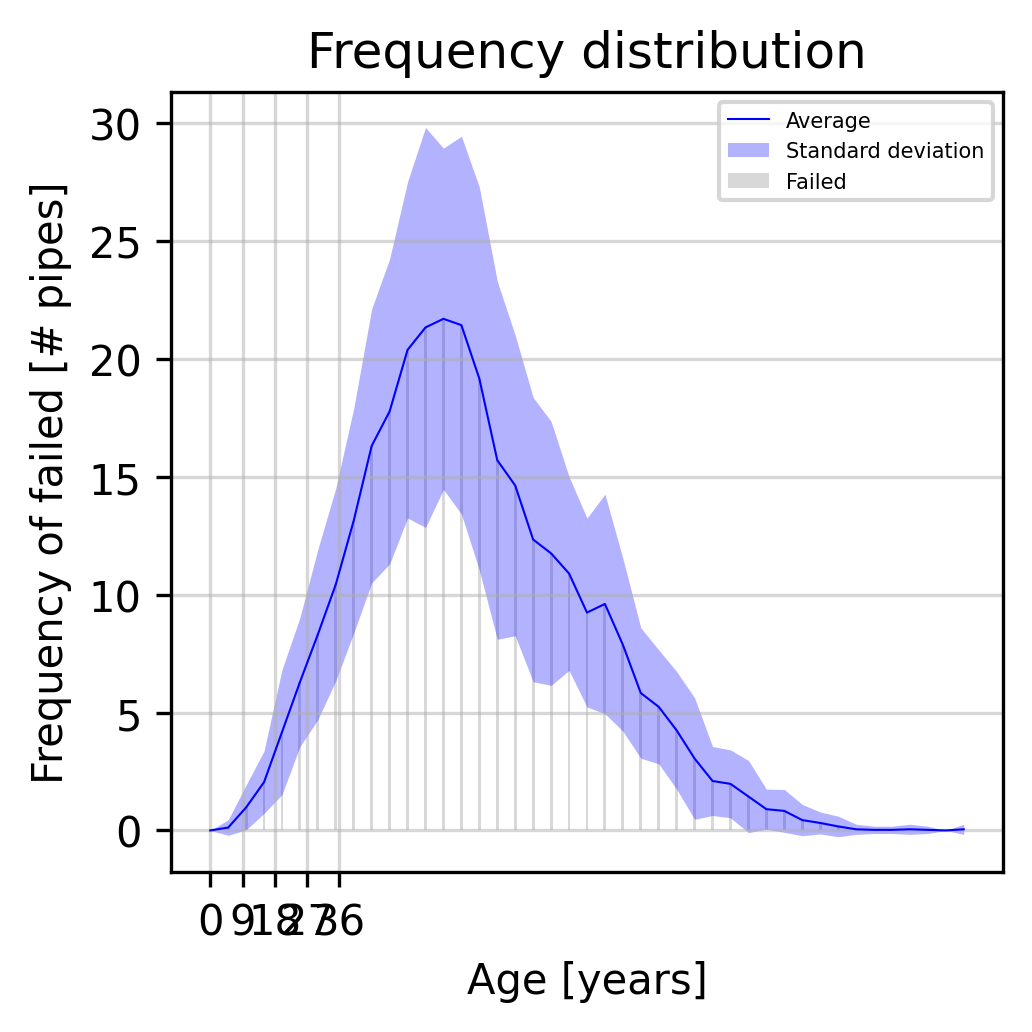

True

In [ ]:
if bool_run_algorithm: plot_distributions(df_distributions, type_dist="frequency", label="failed", color="blue", reference_data=[d_ages,d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

In [ ]:
if bool_run_algorithm: plot_distributions(df_distributions, type_dist="density", label="failure", color="blue", reference_data=[d_ages,d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

/tmp/ipykernel_2181347/2037115321.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, f in dataframe[key].iteritems():


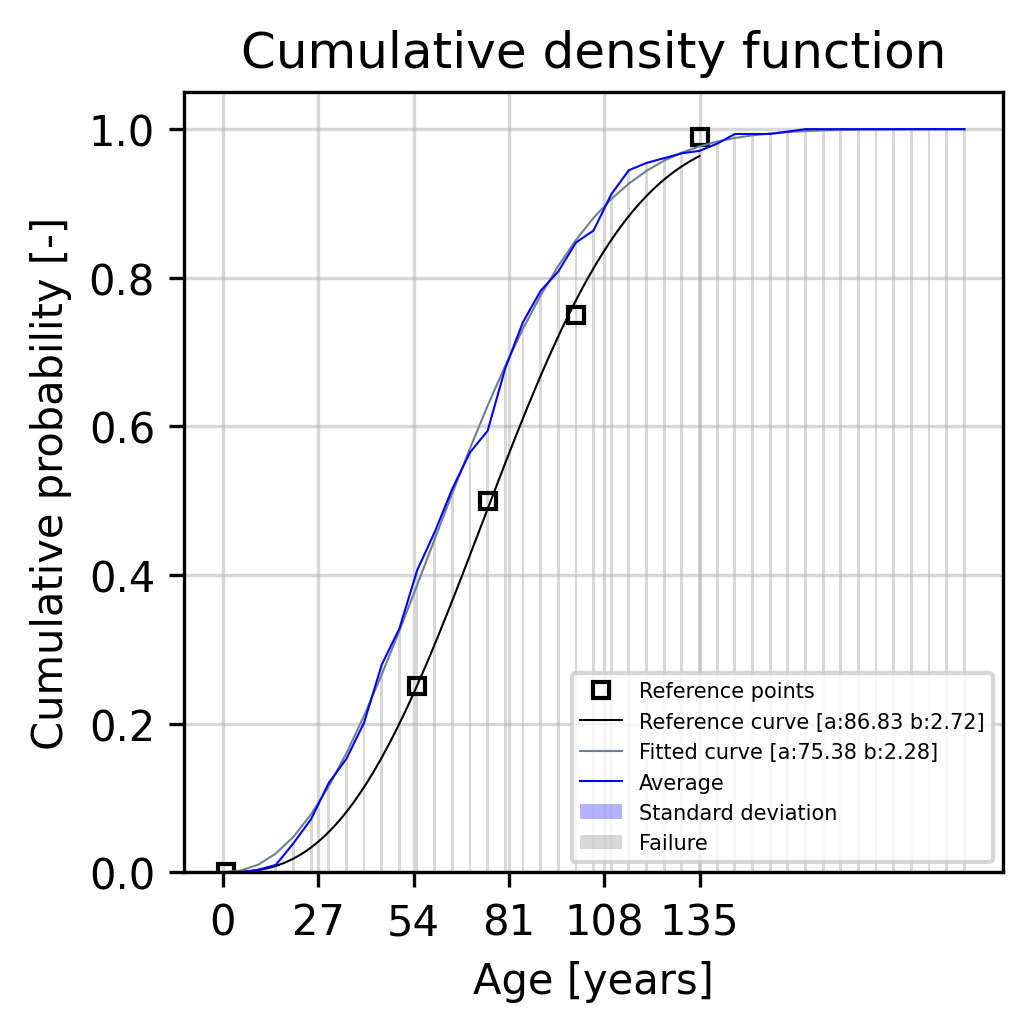

True

In [ ]:
if bool_run_algorithm: plot_distributions(df_distributions, type_dist="cumulative", label="failure", color="blue", reference_data=[d_ages, d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

In [135]:
if bool_run_algorithm:
    # record failures per iteration along the years
    columns = [year_ - year_o for year_ in pipes_dict.keys()]
    df_deterioration = pd.DataFrame(columns = columns)
    df_deterioration.loc["frequency", :] = 0
    df_deterioration.loc["survived", :] = 0
    df_deterioration.loc["pipes", :] = 0
    df_deterioration.loc["density", :] = 0.0
    df_deterioration.loc["cumulative", :] = 0.0

    first_failure_recorded = []
    for yr_ in pipes_dict.keys():


        pipes = pipes_dict[yr_]  # Get dataframe

        amount_pipes = pipes.shape[0]
        
        continue_ = True
        
        for idx, pipe in pipes.iterrows():

            pipe_id = pipes.loc[idx, "BlockID"]
            
            

            # for year in range(year_o, year_ph + 1):
                # print(idx, year, pipe[f'age_{year}'], pipe[f'failed_{year}'])

            failing_age = pipe['age']

            if pipe_id not in first_failure_recorded and pipe['failed'] == 1:
                    # continue_ = False
                    # print(f" Failure pipe {idx}")
                    df_deterioration.loc["frequency", failing_age] += 1
                    df_deterioration.loc["pipes", failing_age] += 1

                    first_failure_recorded.append(pipe_id)
                    # frequency_pipes[age] += 1
                    # frequency_failure[age] += 1
                    
            else:
                df_deterioration.loc["survived", failing_age] += 1
                df_deterioration.loc["pipes", failing_age] += 1
                # frequency_pipes[age] += 1
                # frequency_survival[age] += 1
                
                # if year == year_ph:
                #     continue_ = False
                #     # print(f" NON Failure pipe {idx}")

    # proballitity density of failure
    df_deterioration.loc["density", :] = df_deterioration.loc["frequency", :].divide(amount_pipes, fill_value=np.NaN)

    # cumulative proballitity of failure
    sum_=0
    for k, v in df_deterioration.loc["density"].iteritems():
        print(k, v)
        if  k-1==0:
            df_deterioration.loc["cumulative", k] = v
        else:
            sum_ += v
    #         print(k, "\n", sum_)
            df_deterioration.loc["cumulative", k] = sum_



C:\Users\duquevna\AppData\Local\Temp\ipykernel_16288\3672591720.py:57: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, v in df_deterioration.loc["density"].iteritems():


Empty Dictionaries for failure curves 

## Plot results against reference curve

Frequeny of failures per age across the years and iterations

In [136]:
df__ = pd.DataFrame(index=range(files_count), data=0, columns=range(min_age, max_age+1, year_step))


# Prepare empty dictionaries
df_distributions = dict([(k, df__.copy()) for k in ["frequency_failure",
                                                    "frequency_survival", 
                                                    "frequency_pipes", 
                                                    "density_survival", 
                                                    "density_failure", 
                                                    "cumulative_survival",
                                                    "cumulative_failure"]])

In [137]:
def find_files_with_str (dir_path:Path, connectivity:str, case_study:str, name:str,  search_string:str ):
    """ @param dir_path: Define the directory path
        @param search_string: Define the string to search for in the file names
    """
    files=[]

    # Use the glob method to search for all files in the directory that contain the string
    for f in dir_path.iterdir():
        if not f.is_file() :
            continue
        f_name = f.name

        if search_string in f_name and name in f_name and f_name.startswith(connectivity):
            files.append(f)
        
    # Print the list of matching files
    # for file in files:
    #     print(file)
    
    # print(len(files))

    return files

In [138]:
find_files_with_str (dir_path=result_dir, connectivity=connectivity,case_study=case_study, name=name_pipes, search_string='[0]' )

[WindowsPath('c:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/Data/data/Uster_200_200L/output/csv/deterioration/centralised_Uster_200_200L_pipes_(1888)[0].csv'),
 WindowsPath('c:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/Data/data/Uster_200_200L/output/csv/deterioration/centralised_Uster_200_200L_pipes_(1893)[0].csv'),
 WindowsPath('c:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/Data/data/Uster_200_200L/output/csv/deterioration/centralised_Uster_200_200L_pipes_(1898)[0].csv'),
 WindowsPath('c:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/Data/data/Uster_200_200L/output/csv/deterioration/centralised_Uster_200_200L_pipes_(1903)[0].csv'),
 WindowsPath('c:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/Data/data/Uster_200_200L/output/csv/deterioration/centralised_Uster_200_200L_pipes_(1908)[0].csv'),
 WindowsPath('c:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/Data/data/Uster_200_200L/output/csv/deterioration/centralised_Uster_200_200L_pipes_(19

In [ ]:
# # LOOP PER SIMULATION RUN

# for iteration in range(10+1):
    
#     files = find_files_with_str (dir_path=result_dir, connectivity=connectivity,case_study=case_study, name=name_pipes, search_string=f'[{iteration}]' )
#     first_failure_recorded = []
#     frequency_failure = dict([(k, 0) for k in range(min_age, max_age + 1, year_step)])
#     frequency_survival = dict([(k, 0) for k in range(min_age, max_age + 1, year_step)])        
#     frequency_pipe_ages = dict([(k, 0) for k in range(min_age, max_age + 1, year_step)])
    
#     for file in files:
#         if not file.is_file():
#             verbose(f"!! {file} is not a file")
#             continue
        
#         st=file.name
#         if not st.startswith(connectivity):
#             continue
                

#         pipes = pd.read_csv(file, sep=";", header=0, usecols=['BlockID', f'age', f'p_fail', f'failed'])  # Get dataframe

#         amount_pipes = pipes.shape[0]

        


#         for idx, pipe in pipes.iterrows():

#             pipe_id = pipes.loc[idx,'BlockID']
#             pipe_age = pipes.loc[idx,'age']

#             if pipe_id in first_failure_recorded:
#                 continue

            
#             if pipe[f'failed'] == 1:
#                 first_failure_recorded.append(pipe_id)
#                 frequency_pipe_ages[pipe_age] += 1
#                 frequency_failure[pipe_age] += 1
                
#             else:

#                 frequency_pipe_ages[pipe_age] += 1
#                 frequency_survival[pipe_age] += 1
                
        
#         ## ------Finished loop through the pipes
            
#         # Save to dataframes
#         for age in range(min_age, max_age+1, year_step):

#             df_distributions["frequency_failure"].loc[iteration, age] = frequency_failure[age]  # save failing pipes in the DataFrame
#             df_distributions["frequency_survival"].loc[iteration, age] = frequency_survival[age]  # save surviving pipes in the DataFrame
#             df_distributions["frequency_pipes"].loc[iteration, age] = frequency_pipe_ages[age]  # save surviving pipes in the DataFrame
    
#     if iteration>2:
#         break
    

In [139]:
pd.set_option("display.max_columns",1000)
display(df_distributions['frequency_failure'])

1    6    11   16   21   26   31   36   41   46   51   56   61   66   \
0       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1167    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1168    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1169    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1170    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      71   76   81   86   91   96   101  106  111  116  121  126  131  136  \
0       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1166    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1167    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1168    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1169    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1170    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      141  146  151  
0       0    0    0  
1       0    0    0  
2       0    0    0  
3       0    0    0  
4       0    0    0  
...   ...  ...  ...  
1166    0    0    0  
1167    0    0    0  
1168    0    0    0  
1169    0    0    0  
1170    0    0    0  

[1171 rows x 31 columns]

ValueError: x and y must have same first dimension, but have shapes (43,) and (31,)

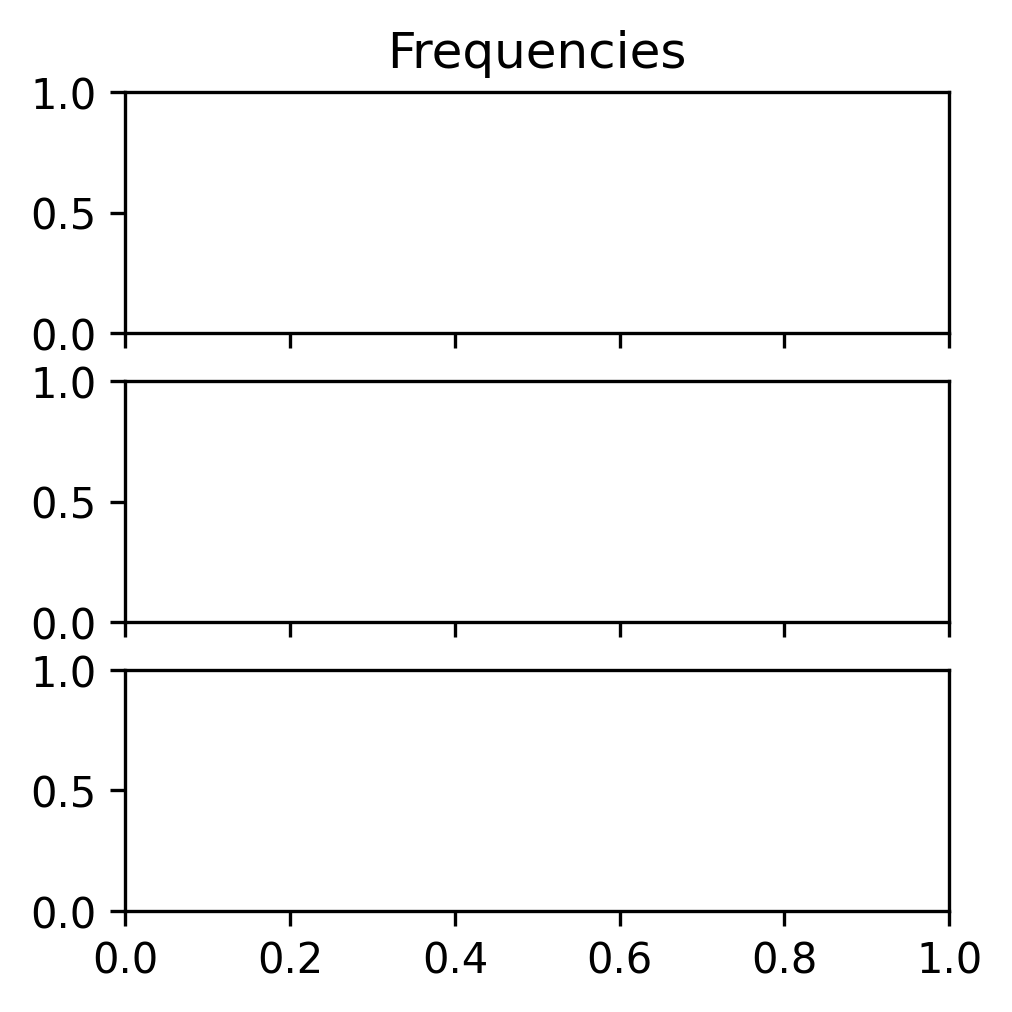

In [142]:
# check amount of pipes per age to normalize correctly
df1=df_distributions["frequency_failure"]
df2=df_distributions["frequency_survival"]
df3= df_distributions["frequency_pipes"]

df_add = df1.add(df2, fill_value=0)
df_equals = df3.equals(df_add)

mean1 = df1.mean(axis=0)
mean2 = df2.mean(axis=0)
mean3 = df3.mean(axis=0)

std1 = df1.std(axis=0)
std2 = df2.std(axis=0)
std3 = df3.std(axis=0)

lb1 = mean1 - std1
lb2 = mean2 - std2
lb3 = mean3 - std3

ub1 = mean1 + std1
ub2 = mean2 + std2
ub3 = mean3 + std3

fig1, (ax1, ax2, ax3) = plt.subplots(3, sharex= True, figsize=(cm2inch((9, 9))), dpi=300)
fig1.set_facecolor("white")
ax1.set_title("Frequencies")

range_ = range(0, tot_simulation_year+1, year_step)

ax1.plot(range_, mean1, color="coral", lw=0.5)
ax1.fill_between(range_, lb1, ub1, color="coral", lw=0, alpha=0.3)

ax2.plot(range_, mean2, color="blue", lw=0.5)
# ax2.plot(range_, mean3, color="red", lw=0.5)
ax2.fill_between(range_, lb2, ub2, color="cornflowerblue", lw=0, alpha=0.3)

ax3.plot(range_, mean3, color="grey", lw=0.5)
ax3.fill_between(range_, lb3, ub3, color="grey", lw=0, alpha=0.3)

# ax3.plot(range(max_age), df_add.mean(axis=0), color="grey", lw=.5)
 
df_equals

densities of failure

In [143]:
tot_simulation_year  = year_ph - year_o
tot_simulation_year

210

In [144]:
amount_pipes

393

ValueError: x and y must have same first dimension, but have shapes (43,) and (31,)

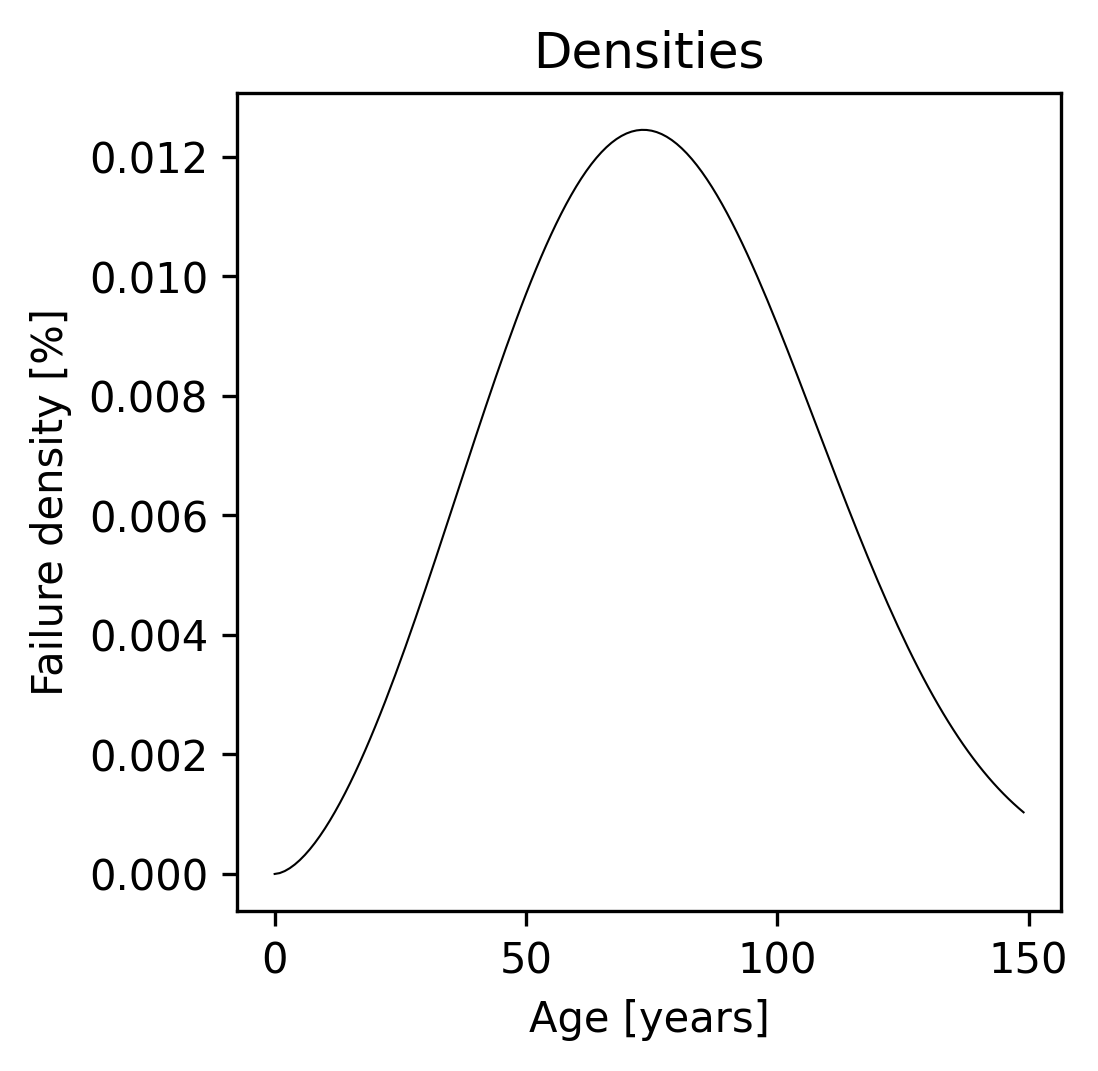

In [145]:


# df_distributions["density_failure"] = df_distributions["frequency_failure"].divide(amount_pipes, fill_value=np.NaN)
df4 = df_distributions["density_failure"]
# print(df_distributions["density_failure"])

mean4 = df4.mean(axis=0)
std4 = df4.std(axis=0)
lb4 = mean4 - std4
ub4 = mean4 + std4


fig2, ax4 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig2.set_facecolor("white")
ax4.set_title("Densities")
ax4.set_ylabel("Failure density [%]")
ax4.set_xlabel("Age [years]")

ax4.plot(range(150), failure_density[:150], color="black", lw=0.5)
ax4.plot(range_, mean4, color="blue", lw=0.5)
ax4.fill_between(range_, lb4, ub4, color="blue", lw=0, alpha=0.3)
ax4.grid(False)


cummulative failure

In [ ]:
# sum_=0
# for k, v in df_distributions["density_failure"].iteritems():
#     if  k-1==0:
#         df_distributions["cumulative_failure"][k] = v
#     else:
#         sum_ += v
# #         print(k, "\n", sum_)
#         df_distributions["cumulative_failure"][k] = sum_

# print(df_distributions["cumulative_failure"][71])

df6 = df_distributions["cumulative_failure"]
# print(df_distributions["cumulative_failure"])

#calculate across the columns 
mean6 = df6.mean(axis=0)
median6 = df6.median(axis=0)
std6 = df6.std(axis=0)
min6 = df6.min(axis=0)
max6 = df6.max(axis=0)
lb6 = mean6 - std6
ub6 = mean6 + std6


fig6, ax6 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig6.set_facecolor("white")

ax6.set_title("Cumulative density function")
ax6.set_ylabel("Cumulative failure [%]")
ax6.set_xlabel("Age [years]")

ax6.plot(range(150), weibull_cumulative_curve[:150], lw=0.5, color="black")

boxprops = dict(linestyle='-', linewidth=0.5, facecolor= "coral", edgecolor= "white", alpha=0.5)
capprops = dict(linestyle='-', linewidth=0.5, color='coral', alpha=0.8)
whiskerprops = dict(linestyle='-', linewidth=0.5, color='coral', alpha=0)
flierprops = dict(marker='o', markersize=2, markeredgecolor='none', markerfacecolor='coral', alpha=0.4)
medianprops = dict(linestyle='-.', linewidth=0.5, color='white')
meanprops = dict(marker='+',linestyle='-', markersize=3, markeredgecolor='none', markerfacecolor='blue')
# BP = ax6.boxplot(df6,  
#             notch=True, 
#             showfliers=True, 
#             meanline=True, 
#             showmeans=True, 
#             patch_artist=True, 
#             boxprops=boxprops, 
#             meanprops=meanprops, 
#             medianprops=medianprops, 
#             capprops=capprops, 
#             whiskerprops=whiskerprops, 
#             flierprops=flierprops)

ax6.plot(range_, median6, color="olive", lw=0.5)
ax6.fill_between(range_, lb6, ub6, color="olive", lw=0, alpha=0.3)
ax6.grid(False)

# x_labes = max(len(df6.columns), max_age)+5
# x_pos = np.arange(x_labes, step=np.round(x_labes/5,0))
# ax6.set_xticks(x_pos)



survival densities

In [ ]:
# Plot only survivals until the first failure for the initial set of pipes in the system 

# df_distributions["density_survival"] = df_distributions["frequency_survival"].divide(amount_pipes, fill_value=np.NaN)
for k, col_survival in df_distributions["frequency_survival"].items():
    
    df_distributions["density_survival"][k] = 1-((df_distributions["frequency_pipes"][k] - col_survival)/(amount_pipes))
df5 = df_distributions["density_survival"]

mean5 = df5.mean(axis=0)
std5 = df5.std(axis=0)
min5 = df5.min(axis=0)
max5 = df5.max(axis=0)
lb5 = mean5 - std5
ub5 = mean5 + std5

fig2, ax5 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig2.set_facecolor("white")
ax5.set_title("Survival density")

ax5.plot(range(tot_simulation_year), survival_density, lw=0.5, color="black")
ax5.plot(range_, mean5, color="cornflowerblue", lw=0.5)
ax5.fill_between(range_, lb5, ub5, color="cornflowerblue", lw=0, alpha=0.3)
ax5.grid(False)


cummulative survival

In [ ]:
sum_ = 0
for k, v in df_distributions["density_failure"].iteritems():
    if k - 1 == 0:

        df_distributions["cumulative_survival"][k] = 1 - v
    else:
        sum_ += v

        df_distributions["cumulative_survival"][k] = 1 - sum_


# print(df_distributions["cumulative_failure"][71])

df6 = df_distributions["cumulative_survival"]
# print(df_distributions["cumulative_failure"])

#calculate across the columns 
mean6 = df6.mean(axis=0)
median6 = df6.median(axis=0)
std6 = df6.std(axis=0)
min6 = df6.min(axis=0)
max6 = df6.max(axis=0)
lb6 = mean6 - std6
ub6 = mean6 + std6


fig6, ax6 = plt.subplots(figsize=(cm2inch((9, 9))), dpi=300)
fig6.set_facecolor("white")

ax6.set_title("Cumulative density function- Survival")

ax6.plot(range(tot_simulation_year), survival_curve[:tot_simulation_year], lw=0.5, color="black")
# ax6.plot(range(150), cum_lst[:150], lw=0.5, color="red")

boxprops = dict(linestyle='-', linewidth=0.5, facecolor= "coral", edgecolor= "white", alpha=0.5)
capprops = dict(linestyle='-', linewidth=0.5, color='coral', alpha=0.8)
whiskerprops = dict(linestyle='-', linewidth=0.5, color='coral', alpha=0)
flierprops = dict(marker='o', markersize=2, markeredgecolor='none', markerfacecolor='coral', alpha=0.4)
medianprops = dict(linestyle='-.', linewidth=0.5, color='white')
meanprops = dict(marker='+',linestyle='-', markersize=3, markeredgecolor='none', markerfacecolor='blue')
# BP = ax6.boxplot(df6,  
#             notch=True, 
#             showfliers=True, 
#             meanline=True, 
#             showmeans=True, 
#             patch_artist=True, 
#             boxprops=boxprops, 
#             meanprops=meanprops, 
#             medianprops=medianprops, 
#             capprops=capprops, 
#             whiskerprops=whiskerprops, 
#             flierprops=flierprops)

ax6.plot(range_, median6, color="cornflowerblue", lw=0.5)
ax6.fill_between(range_, lb6, ub6, color="cornflowerblue", lw=0, alpha=0.3)
ax6.grid(False)

# x_labes = max(len(df6.columns), max_age)+5
# x_pos = np.arange(x_labes, step=np.round(x_labes/5,0))
# ax6.set_xticks(x_pos)


## Run Test Case

In [148]:
plot=True
grid=10
case_study = f"Case_{grid}x{grid}_200xFlow"
input_path = TEST_DATA_DIR/case_study/"output/shp"
output_path = TEST_DATA_DIR /case_study/"output"
connectivity= "centralised"

In [149]:
tt = float(time.time())

df_distributions, times_dict = run_module(iterations=1,
            year_i=year_i,
            year_f=year_f, 
            year_step=year_step,  
            years_warm_up=years_warm_up,
            planning_horizon=planning_horizon,                  
            d_ages=d_ages,    
            d_failures=d_failures,
            input_path=input_path,
            output_path=output_path,
            verbose=verbose,
            notify=notify)

total_time = time.time() - tt

Weibull: parameters [86.8254304   2.71860776]; covariance [[ 1.45346304 -0.04219712]
 [-0.04219712  0.02404958]]
iteration 1
designed years [2018, 2023, 2028, 2033, 2038]
_______________save output 1888 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\shp\deterioration\centralised\centralised_Case_10x10_200xFlow_blocks_(1888)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\shp\deterioration\centralised\centralised_Case_10x10_200xFlow_pipes_(1888)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\csv\deterioration\centralised\centralised_Case_10x10_200xFlow_blocks_(1888)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\csv\deterioration\centralised\centralised_Case_10x10_200xFlow_pipes_(1888)[1]


ValueError: not enough values to unpack (expected 2, got 1)

ploting results of test case

In [158]:
result_dir = TEST_DATA_DIR /case_study/ "output/csv"/ module/connectivity
result_dir

WindowsPath('c:/Users/duquevna/Dropbox/010_PhD/01_Python/SND_Manual/tests/data/Case_10x10_200xFlow/output/csv/deterioration/centralised')

In [159]:
# create df to plot the probability distributions.
age_range = range( 0, 210, year_step)
print(age_range)

range(0, 210, 5)


In [160]:
df_distributions= g_distributions(result_dir, age_range, iterations= 1)

C:\Users\duquevna\AppData\Local\Temp\ipykernel_16288\3056862664.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, f in dataframe[key].iteritems():


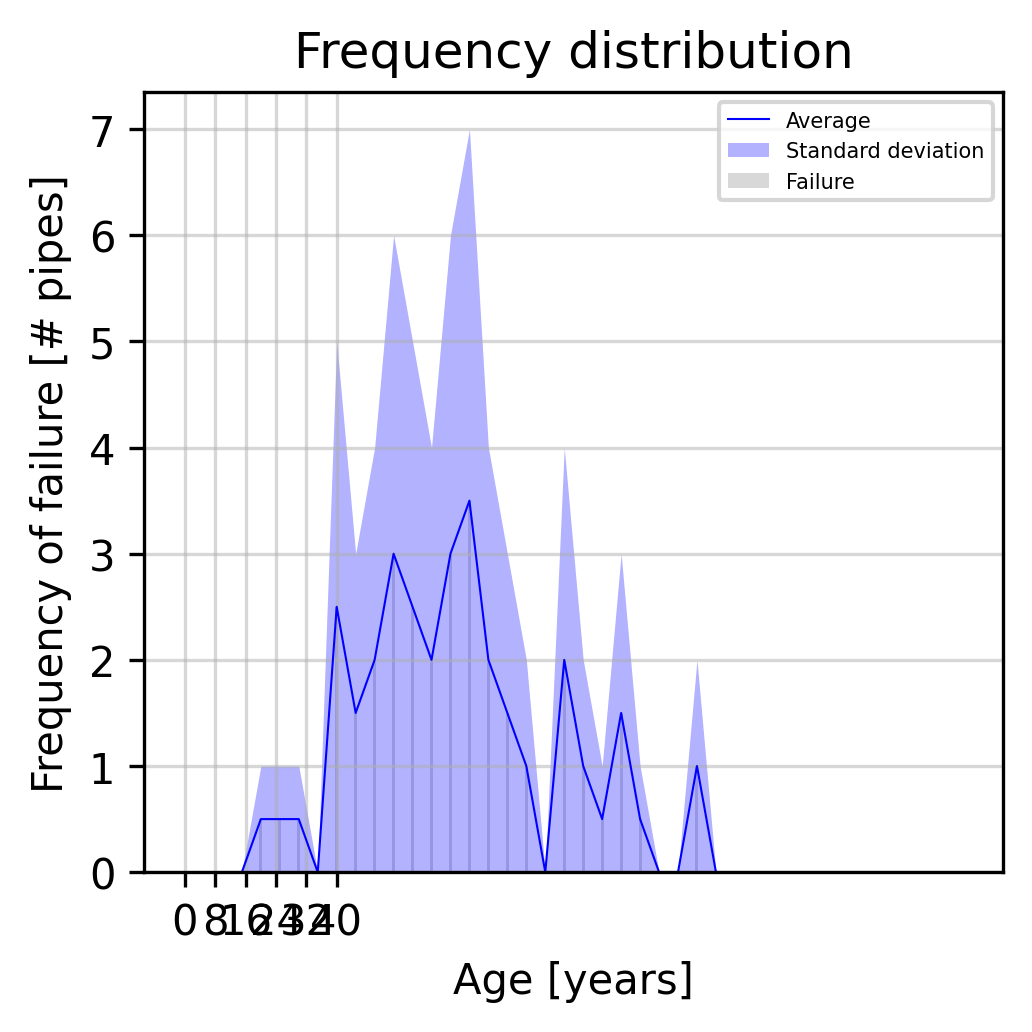

True

In [162]:
plot_distributions(df_distributions, type_dist="frequency", label="failure", color="blue", reference_data=[d_ages,d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

C:\Users\duquevna\AppData\Local\Temp\ipykernel_16288\3056862664.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, f in dataframe[key].iteritems():


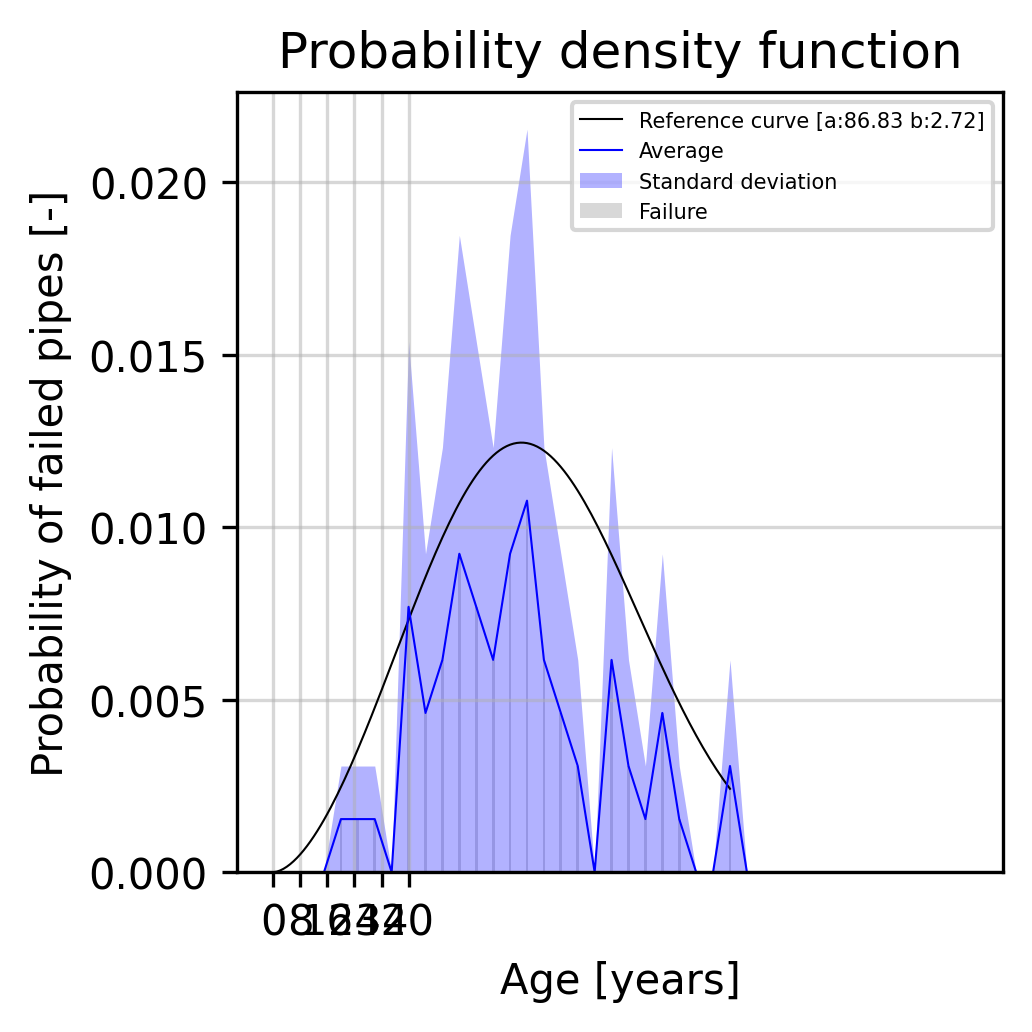

True

In [163]:
plot_distributions(df_distributions, type_dist="density", label="failure", color="blue", reference_data=[d_ages,d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

C:\Users\duquevna\AppData\Local\Temp\ipykernel_16288\3056862664.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, f in dataframe[key].iteritems():
C:\Users\duquevna\AppData\Local\Temp\ipykernel_16288\2307810706.py:23: RuntimeWarning: divide by zero encountered in power
  return np.where(x > 0, 1 - np.exp(-(x / a) ** b), 0)
c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\venv\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


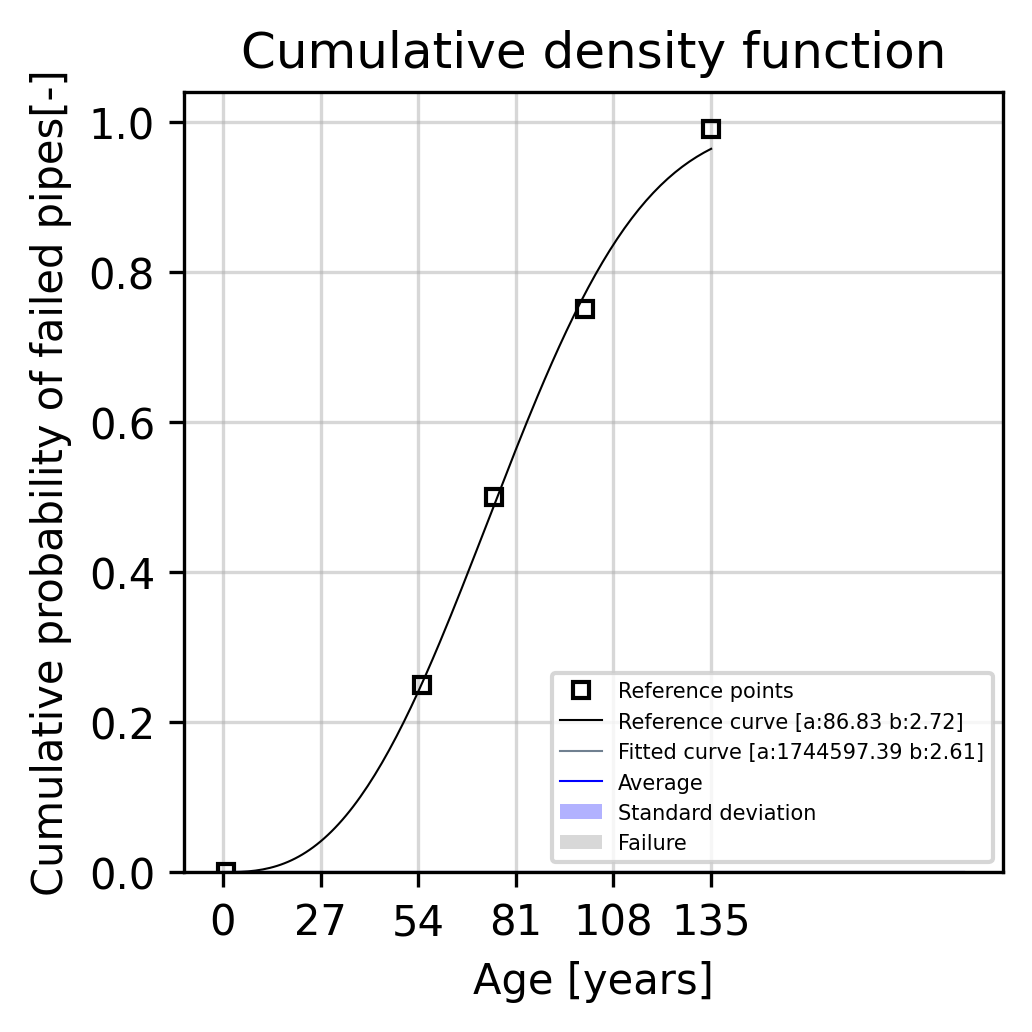

True

In [164]:
plot_distributions(df_distributions, type_dist="cumulative", label="failure", color="blue", reference_data=[d_ages, d_failures], distribution="Weibull", years_tot_sim=0, verbose=False)

read and plot failure over time

In [ ]:
"C:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\deterioration\decentralised\decentralised_Case_10_grid_pipes_(2018)[1]\decentralised_Case_10_grid_pipes_(2018)[1].shp"

In [165]:
test_blocks_dict=dict()
test_pipes_dict=dict()

for year in range(year_i, year_f+1, year_step):

        # Start counting the execution time
        st = float(time.time())

        # Read input 
        path_blocks=input_path/module/connectivity/fr"{connectivity.lower()}_{case_study}_blocks_({year})[1]/{connectivity.lower()}_{case_study}_blocks_({year})[1].shp"
        print(path_blocks)
        blocks = gpd.read_file(path_blocks)
        test_blocks_dict[year] = blocks
        
        
        path_pipes=input_path/module/connectivity/f"{connectivity.lower()}_{case_study}_pipes_({year})[1]/{connectivity.lower()}_{case_study}_pipes_({year})[1].shp"
        pipes = gpd.read_file(path_pipes)
        print(path_pipes)
        test_pipes_dict[year] = pipes

c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\shp\deterioration\centralised\centralised_Case_10x10_200xFlow_blocks_(2018)[1]\centralised_Case_10x10_200xFlow_blocks_(2018)[1].shp
c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\shp\deterioration\centralised\centralised_Case_10x10_200xFlow_pipes_(2018)[1]\centralised_Case_10x10_200xFlow_pipes_(2018)[1].shp
c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\shp\deterioration\centralised\centralised_Case_10x10_200xFlow_blocks_(2023)[1]\centralised_Case_10x10_200xFlow_blocks_(2023)[1].shp
c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\shp\deterioration\centralised\centralised_Case_10x10_200xFlow_pipes_(2023)[1]\centralised_Case_10x10_200xFlow_pipes_(2023)[1].shp
c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10x10_200xFlow\output\shp\deterio

In [166]:
# test_pipes_dict[2038].replace( f'Non_failed',0, inplace=True)
sum(test_pipes_dict[2023]["failed"]>0)

3


--------2018 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC1971160>, <matplotlib.collections.PathCollection object at 0x000001BBC0613070>] ['\nhas_wwtp', '0.0', 'has_wwtp']
----------EN OF HANDLES-----------

Plotting pipes 'failed' ...

--------2023 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC1971160>, <matplotlib.collections.PathCollection object at 0x000001BBC0613070>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC19E2280>, <matplotlib.collections.PathCollection object at 0x000001BBC19F2670>] ['\nhas_wwtp', '0.0', 'has_wwtp', '\nhas_wwtp', '0.0', 'has_wwtp']
----------EN OF HANDLES-----------

Plotting pipes 'failed' ...

--------2028 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC1971160>, <matplotlib.collections.PathCollection object at 0x000001BBC0613070>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC19E2280>, <matplotlib.collections.PathCollection object at 0x000001BBC19F2670>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBBF1EA9D0>, <matplotlib.collections.PathCollection object at 0x000001BBC61BB1C0>] ['\nhas_wwtp', '0.0', 'has_wwtp', '\nhas_wwtp', '0.0', 'has_wwtp', '\nhas_wwtp', '0.0', 'has_wwtp']
----------EN OF HANDLES-----------

Plotting pipes 'failed' ...

--------2033 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC1971160>, <matplotlib.collections.PathCollection object at 0x000001BBC0613070>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC19E2280>, <matplotlib.collections.PathCollection object at 0x000001BBC19F2670>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBBF1EA9D0>, <matplotlib.collections.PathCollection object at 0x000001BBC61BB1C0>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBBF220160>, <matplotlib.collections.PathCollection object at 0x000001BBC00E1940>] ['\nhas_wwtp', '0.0', 'has_wwtp', '\nhas_wwtp', '0.0', 'has_wwtp', '\nhas_wwtp', '0.0', 'has_wwtp', '\nhas_wwtp', '0.0', 'has_wwtp']
----------EN OF HANDLES-----------

Plotting pipes 'failed' ...

c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:819: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  a, b = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC1971160>, <matplotlib.collections.PathCollection object at 0x000001BBC0613070>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC19E2280>, <matplotlib.collections.PathCollection object at 0x000001BBC19F2670>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBBF1EA9D0>, <matplotlib.collections.PathCollection object at 0x000001BBC61BB1C0>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBBF220160>, <matplotlib.collections.PathCollection object at 0x000001BBC00E1940>, <matplotlib.lines.Line2D object at 0x000001BBC02ED940>, <matplotlib.collections.PathCollection object at 0x000001BBC010A7C0>, <matplotlib.collections.PathCollection object at 0x000001BBBF34B550>] 

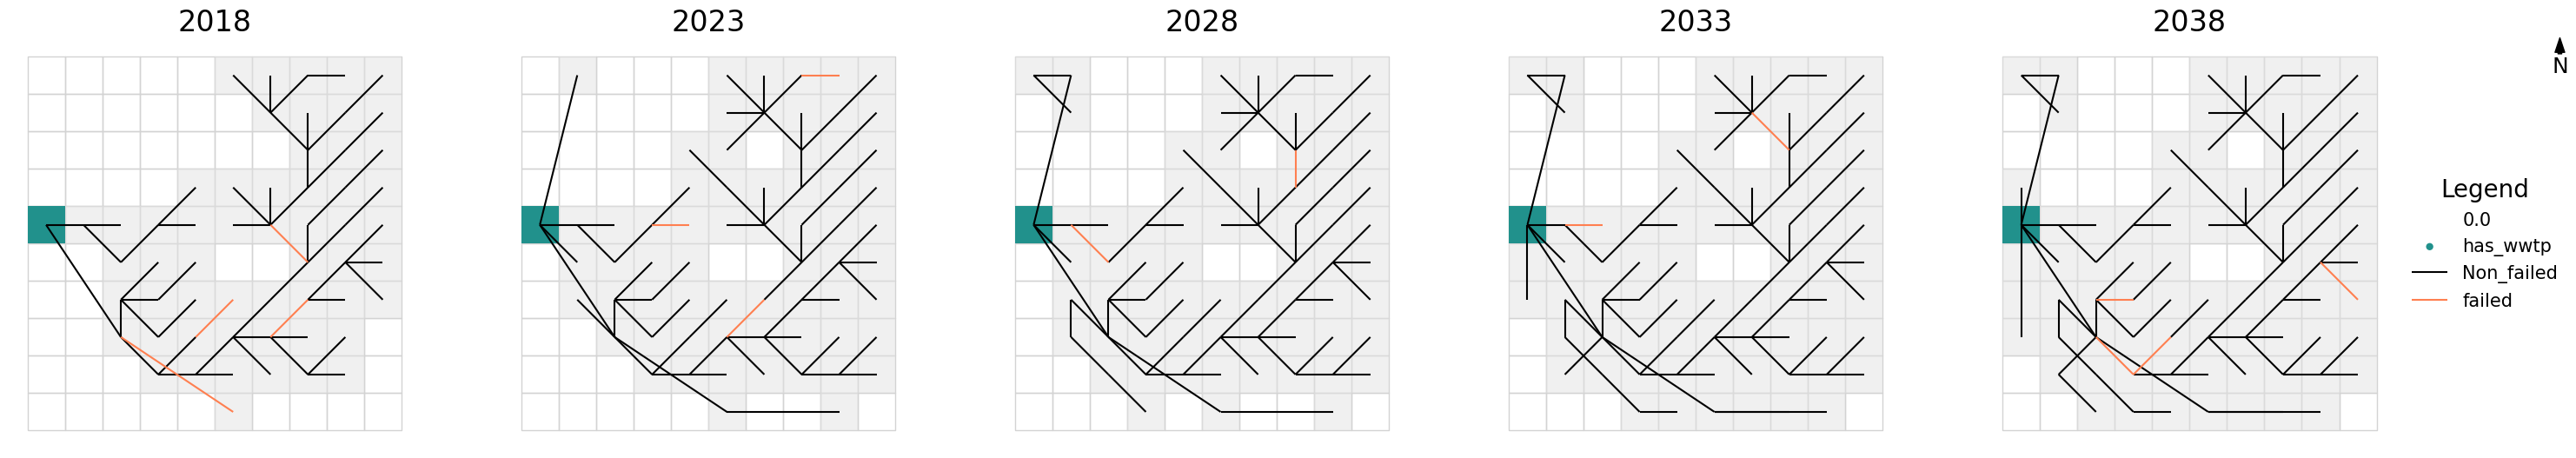

In [167]:
plot_development(poly_dict=test_blocks_dict, 
                    lineStr_dict=test_pipes_dict, 
                    feature_poly="has_wwtp", units_poly = "[delta]", cmap_poly= pl.cm.viridis,
                    feature_lineStr="failed", units_lineStr = "[-]", cmap_lineStr=pl.cm.viridis,
                    module=module, connectivity=connectivity, case_study=case_study, plot=plot, 
                    backgroud_layers=["has_ww"], cmap_background_layers=[pl.cm.Greys],
                    path=output_path,
                    verbose=False,
                    )